# Lending Club Case Study 

___

**Background :**
A consumer finance company **Lending Club** specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are **two types** of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

- **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

- **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

___

### Aim of Case Study:

**Business Problem:** Like most other lending companies, **lending loans to risky applicants is the largest source of financial loss** (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

**Business Objective:** The main objective of this study is to **identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss**. Identification of such applicants using EDA is the aim of this case study. 

**Goal of Exploratory Data Analysis:** Finding the variables which are strong indicators of default i.e. , **the company wants to understand the driving factors (or driver variables) behind loan default**.  The company can utilise this knowledge for its portfolio and risk assessment. 

**There are two sections in this notebook, as following:**  
1. Data Import & Cleaning
2. Exploratory Data Analysis
    - Univariate Analysis
    - Bivariate Analysis

___

## 1. Data Import and Cleaning

We are provided with the complete **loan data** for all loans issued through the time period **2007 to 2011** by Lending Club.
<br>A data dictionary is also provided which describes the meaning of these attributes or variables.

### 1.1 Importing data

In [1]:
# Importing the required python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the loan.csv file
loan = pd.read_csv("loan.csv",encoding="ISO-8859-1")

# Inspecting the loan dataframe
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Describing the loan dataframe
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# No of rows and columns 
loan.shape

(39717, 111)

We can see that the data contains 39717 entries with 111 attributes. On inspection, we saw that many attributes contain null 
values which will not contribute to our analysis thus we will drop these attributes or columns and perform the required data cleaning on the given dataset.

Thus, before doing further analysis on these attributes, let us inspect each of them and perform required data cleaning so that useful insights can be extracted from the data.

___

### 1.2 Data Cleaning

#### Drop all columns with no/missing values

In [5]:
# Removing the columns having all values as null (NA or NaN).
loan.dropna(axis=1,how='all',inplace=True)
loan.shape

(39717, 57)

Now, we are left with 57 columns. The rest of the columns or attributes have been dropped.

In [6]:
# Verifying the rows which have all the values as null
loan.isnull().all(axis=1).sum()


0

Thus, there are no rows containing all values as null.

In [7]:
# Inspecting the data type of each column for further data cleaning
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Let us further check the percentage of missing values in each column separately.

#### Drop all columns with more than 50% missing values

In [8]:
# Percentage of missing values in each column
loan.isnull().sum(axis=0)*100/loan.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


We can see in this table that, **next_payment_d**, **mths_since_last_record** and **mths_since_last_delinq** contain more than 50% missing values, thus let us drop these columns for further analysis.

In [9]:
##### Dropping columns with more than 50% missing values
del loan['next_pymnt_d']
del loan['mths_since_last_record']
del loan['mths_since_last_delinq']

In [10]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

Since all the values are same for this column hence dropping _collections_12_mths_ex_med_.

In [11]:
del loan['collections_12_mths_ex_med']

Dropping url column as we already have loan ids in id column and rest of the url is same.

In [12]:
del loan['url']

In [13]:
loan.shape

(39717, 52)

#### Inspect other columns data

> Inspecting the **emp_title** column.

In [14]:
print("Percentage of missing values: ", round(loan['emp_title'].isnull().sum()*100/len(loan['emp_title']),2), "%")
loan['emp_title'].value_counts()

Percentage of missing values:  6.19 %


US Army                         134
Bank of America                 109
IBM                              66
AT&T                             59
Kaiser Permanente                56
                               ... 
Dreyer's Grand Ice Cream          1
AB Tech Community College         1
Omnicom Group                     1
Midkiff, Muncie & Ross, P.C.      1
MWV                               1
Name: emp_title, Length: 28820, dtype: int64

Here, we can see that **6.19 % of values are missing** in this column.  
As these are company titles, it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

> Inspecting the **emp_length** column.

In [15]:
print("Percentage of missing values: ", round(loan['emp_length'].isnull().sum()*100/len(loan['emp_length']),2), "%")
loan['emp_length'].value_counts()

Percentage of missing values:  2.71 %


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Here, we can see that **2.71 % of values are missing** in this column.  
As these are no of employment years information, so it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

> Inspecting the **desc** column.

In [16]:
print("Percentage of missing values: ", round(loan['desc'].isnull().sum()*100/len(loan['desc']),2), "%")

Percentage of missing values:  32.58 %


As we have **purpose** and **issue_d** of loan in different columns hence nothing much can be extracted from here.
Also, if we remove the rows corresponding to the missing values and retain the column it will lead to data loss which could rather have been useful.

In [17]:
del loan['desc']

Dropping the column after analysis of the description.
Also, the purpose and issue date could be extracted from other columns as well.

> Inspecting the **title** column.

In [18]:
print("Percentage of missing values: ", round(loan['title'].isnull().sum()*100/len(loan['title']),2), "%")
loan['title'].value_counts()

Percentage of missing values:  0.03 %


Debt Consolidation                    2184
Debt Consolidation Loan               1729
Personal Loan                          659
Consolidation                          517
debt consolidation                     505
                                      ... 
Debbie Debt Consolidation                1
Jakes personal loan                      1
Search Technology                        1
Credit card promotions ending soon       1
Loan Consildation                        1
Name: title, Length: 19615, dtype: int64

Here, we can see that **0.03 % of values are missing** in this column.  
As these are the loan titles provided by the borrower, it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

> Inspecting the **revol_util** column

In [19]:
print("Percentage of missing values: ", round(loan['revol_util'].isnull().sum()*100/len(loan['revol_util']),2), "%")
loan['revol_util'].value_counts()

Percentage of missing values:  0.13 %


0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
         ... 
56.26%      1
0.05%       1
8.01%       1
32.71%      1
0.54%       1
Name: revol_util, Length: 1089, dtype: int64

Here, we can see that **0.13 % of values are missing** in this column.  
As these are the revolving line utilization rates, it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

> Inspecting the **last_pymnt_d** column

In [20]:
print("Percentage of missing values: ", round(loan['last_pymnt_d'].isnull().sum()*100/len(loan['last_pymnt_d']),2), "%")
loan['last_pymnt_d'].value_counts()

Percentage of missing values:  0.18 %


May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

Here, we can see that **0.18 % of values are missing** in this column.  
As these are last month payment information, it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

> Inspecting the **last_credit_pull_d** column

In [21]:
print("Percentage of missing values: ", round(loan['last_credit_pull_d'].isnull().sum()*100/len(loan['last_credit_pull_d']),2), "%")
loan['last_credit_pull_d'].value_counts()

Percentage of missing values:  0.01 %


May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
Jun-08        1
May-07        1
Jul-08        1
Jul-07        1
May-08        1
Name: last_credit_pull_d, Length: 106, dtype: int64

Here, we can see that **0.01 % of values are missing** in this column.  
As these are credit date information, it would not be a good idea to impute the missing values.  
Thus, we will retain this column as is for now.

#### Remove columns with constant value throughout

In [22]:
# Finding columns with same values in all rows 
nunique = loan.apply(pd.Series.nunique)
cols_with_same_values = nunique[nunique == 1].index
print(cols_with_same_values)

# Dropping these columns as theese  will not ad any value to the analysis
loan.drop(cols_with_same_values,axis=1,inplace=True)
nunique = loan.apply(pd.Series.nunique)
cols_with_same_values = nunique[nunique == 1].index
print(cols_with_same_values)

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')
Index([], dtype='object')


We have now also removed all columns without any varaition in values as it would not add any value to our analysis.

In [23]:
# Verifying the columns extracted above with few unique values
print('term:', loan['term'].value_counts(), '\n')
print('verification_status:', loan['verification_status'].value_counts(), '\n')
print('loan_status:', loan['loan_status'].value_counts(), '\n')
print('pub_rec_bankruptcies:', loan['pub_rec_bankruptcies'].value_counts(), '\n')

# Retaining all as they seem reasonable and logical values

term:  36 months    29096
 60 months    10621
Name: term, dtype: int64 

verification_status: Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64 

loan_status: Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64 

pub_rec_bankruptcies: 0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64 



Thus, we have retained all other columns.  
Now, let us remove all the remaining rows having missing values.

In [24]:
loan.shape

(39717, 43)

#### Dropping all rows with any missing values

In [25]:
#Dropping rows with mising values now
loan.dropna(axis=0,how='any',inplace=True)

In [26]:
#Resetting the index post removal of rows with missing values
loan.reset_index(inplace=True,drop =True)
loan.shape

(36433, 43)

Thus, now we have loan dataframe having 39717 rows and 44 columns which can be used for further analysis.

In [27]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [28]:
#Verifying if there are any missing values now
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

Now, all of the rows or columns have a missing value have been removed from the dataset.  
The next step is to fix the data types of various columns in the modified loan dataframe.

#### Fixing column data types

In [29]:
### Checking columns datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [30]:
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
23681,585053,751740,7000,7000,7000.0,36 months,7.14%,216.59,A,A3,...,7795.22,7000.0,795.22,0.0,0.00,0.0,Sep-13,231.12,Sep-15,0.0
15154,735134,931750,5500,5500,5500.0,36 months,11.11%,180.35,B,B5,...,6492.58,5500.0,992.58,0.0,0.00,0.0,May-14,206.23,Nov-14,0.0
21486,618484,792830,4750,4750,4750.0,36 months,12.23%,158.30,C,C1,...,5698.74,4750.0,948.74,0.0,0.00,0.0,Dec-13,166.48,Sep-15,1.0
23283,591885,760199,5000,5000,5000.0,36 months,14.84%,172.94,D,D1,...,6225.80,5000.0,1225.80,0.0,0.00,0.0,Oct-13,179.21,Nov-14,0.0
12192,787280,990803,12000,12000,12000.0,60 months,13.49%,276.06,C,C2,...,3035.24,1636.8,1388.31,0.0,10.13,0.0,Jun-12,276.06,May-16,0.0


As we can see, a lot of columns are not stored in the desired data type by python, thus it need to be fixed before going further.

In [31]:
#Converting term column datatype from object to int 
loan.term = loan.term.apply(lambda x :int(x[:-7]))
loan.term.head()

0    60
1    36
2    60
3    36
4    60
Name: term, dtype: int64

**term** has been converted into **int** type from **object** type.

In [32]:
#Converting int_rate column datatype from object to float 
loan.int_rate = loan.int_rate.apply(lambda x :float(x[:-1]))
loan.int_rate.head()

0    15.27
1    13.49
2    12.69
3     7.90
4    15.96
Name: int_rate, dtype: float64

**int_rate** has been converted into **float** type from **object** type.

In [33]:
#Converting emp_length column datatype from object to int
loan.emp_length = loan.emp_length.apply(lambda x : int(''.join(filter(lambda i:i.isdigit(),x))))
loan.emp_length.head()

0     1
1    10
2     1
3     3
4     8
Name: emp_length, dtype: int64

**emp_length** has been converted into **int** type from **object** type.

In [34]:
#Converting issue_d column datatype from object to datetime
loan.issue_d = pd.to_datetime(loan.issue_d,format='%b-%y')
loan.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

**issue_d** has been converted into **datetime** type from **object** type.

In [35]:
#Reformatting column name for title column
loan.title = loan.title.apply(lambda x: x.lower())
loan.title.head()

0                                     bike
1                                 personel
2                                 personal
3    my wedding loan i promise to pay back
4                                     loan
Name: title, dtype: object

**title** has been converted into **lowercase** for uniformity.

In [36]:
loan.title.value_counts()
loan.title =  loan.title.apply(lambda x: "debt consolidation" if 'consolidation' in x else x)
loan.title =  loan.title.apply(lambda x: "personal loan" if 'personal' in x else x)
loan.title.head()

0                                     bike
1                                 personel
2                            personal loan
3    my wedding loan i promise to pay back
4                                     loan
Name: title, dtype: object

**title** has been cleaned to include the required phrases for uniformity.

In [37]:
#Re formatting column zip code and converting to int data type
loan.zip_code = loan.zip_code.apply(lambda x : int(x[:-2]))
loan.zip_code.head()

0    309
1    917
2    972
3    852
4    280
Name: zip_code, dtype: int64

**zip_code** has been formatted and converted into **int** type from **object** type containing **xxx** values in the end of zip code string.

In [38]:
#Converting the data type of earliest_cr_line from object to datetime
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line,format= '%b-%y')
loan.earliest_cr_line.head()

0   1999-04-01
1   1996-02-01
2   1996-01-01
3   2004-11-01
4   2005-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

**earliest_cr_line** has been converted into **datetime** type from **object** type.

In [39]:
# Converting the datatype 
loan.revol_util.value_counts()
loan.revol_util = loan.revol_util.apply(lambda x :float(x[:-1]))
loan.revol_util.head()

0     9.4
1    21.0
2    53.9
3    28.3
4    85.6
Name: revol_util, dtype: float64

**revol_util** has been converted into **float** type from **object** type.

In [40]:
# Converting the data type of last_pymnt_d from object to datetime
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d,format= '%b-%y')
loan.last_pymnt_d.head()

0   2013-04-01
1   2015-01-01
2   2016-05-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

**last_pymnt_d** has been converted into **datetime** type from **object** type.

In [41]:
#Converting the data type of last_credit_pull_d from object to datetime
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d,format= '%b-%y')
loan.last_credit_pull_d.head()

0   2013-09-01
1   2016-04-01
2   2016-05-01
3   2016-01-01
4   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]

**last_credit_pull_d** has been converted into **datetime** type from **object** type.

Converting string datatype columns to lower case wherever required as some columns have only few categories and do not require any fix as verified by filtering using excel. E.g. verification_status


In [42]:
#Converting for emp_title column
loan.emp_title = loan.emp_title.apply(lambda x: x.lower())
loan.emp_title.head()

0                        ryder
1          air resources board
2     university medical group
3         veolia transportaton
4    southern star photography
Name: emp_title, dtype: object

**emp_title** has been converted into **lowercase** for uniformity.

In [43]:
#Converting for title column
loan.title = loan.title.apply(lambda x: x.lower())
loan.title.head()

0                                     bike
1                                 personel
2                            personal loan
3    my wedding loan i promise to pay back
4                                     loan
Name: title, dtype: object

**title**  has been converted into **lowercase** for uniformity.

In [44]:
loan.shape

(36433, 43)

After performing the required cleaning and data formatting, we now have loan dataset without any missing values with the columns storing data in correct formats.  

We can now perform some visual data analysis on the remaining loan attributes to derive the important factors in loan default.

___

### 2. Exploratory Data Analysis

#### Analysing different columns

Extracting the loan status into different dataframes namely charged_off,fully_paid and current for further analysis

In [45]:
#People who have loan status as charged off
charged_off = loan[loan['loan_status']=='Charged Off']
#People who have loan status as fully paid
fully_paid = loan[loan['loan_status']=='Fully Paid']
#People who have loan status as current
current = loan[loan['loan_status']=='Current']

In [46]:
# Summary of various types of loans
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Current,1066.0,17100.703565,8571.093163,1000.0,12000.0,16000.0,22800.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


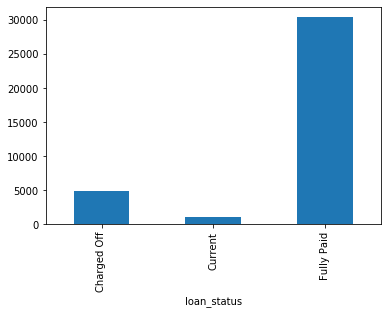

In [47]:
loan.groupby('loan_status').loan_amnt.count().plot.bar()

___

### Univariate and Bivariate analysis

Since we wish to compare **fully paid vs charged_off** status, we can remove the data of ongoing loans i.e. rows with loan status as 'Current' to simplify the analysis.

In [48]:
loan = loan[loan.loan_status != "Current"]

Finding correlation between numerical columns so as to find out related variables, and variables which are not related to any. This will help ease the analysis going further.

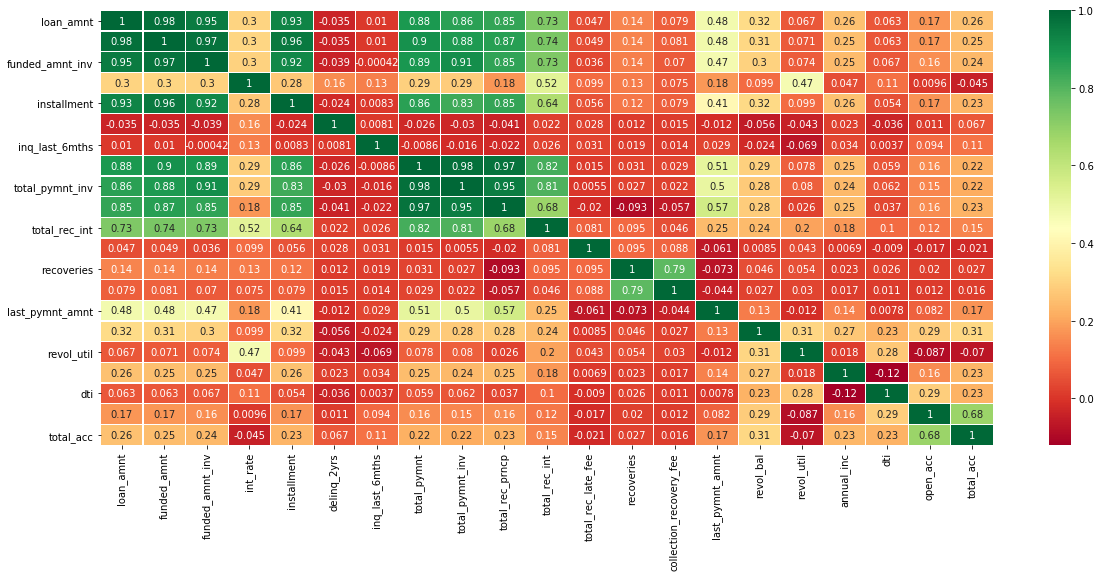

In [49]:
loan_corr = loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','delinq_2yrs',\
                                'inq_last_6mths','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',\
                                'total_rec_late_fee','recoveries', 'collection_recovery_fee','last_pymnt_amnt',\
                                'revol_bal','revol_util','annual_inc','dti','open_acc','total_acc']]

sns.heatmap(loan_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

Here, we are not considering **out_prncp**,**out_prncp_inv** as they have very few non zero values and might cause issue in plotting. 

With the plot above following conclusion regarding correlation between variables can be made:
1. **loan_amnt,funded_amnt,funded_amnt_inv,installment** are highly correlated.
2. **total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int** are highly correlated but might not be of much interest to us as they are customer behavioural attributes.
3. **recoveries,collection_recovery_fee** are correlated to each other.
4. **open_acc,total_acc** are correlated to each other.

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- loan_amnt revol_bal are correlated with r factor .32 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

Other columns of interest on which analysis can be performed are as following out of which some are not important for this case study as they are customer behaviour attributes which could be only analysed once the loan application is approved:

1. int_rate
2. delinq_2yrs
3. inq_last_6mths
4. revol_bal
5. total_rec_late_fee
6. last_pymnt_amnt
7. revol_util
8. annual_inc
9. dti
10. out_prncp_out_prncp_inv

But, we will plot visualization on these variables to understand the underlying insights in data by performing univariate and bivariate analysis and only consider those attributes in final analysis which are not customer behavioural attributes and consider only those which can be analysed before the loan aplication is approved.

**Comparison of Number of entries marked as 'Fully Paid' and 'Charged Off'**

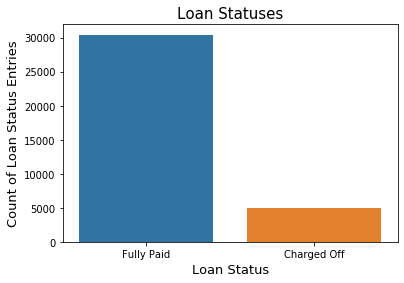

In [50]:
# Number of entries with loan status are fully paid or charged off
sns.barplot(x=loan.loan_status.value_counts().index, y=loan.loan_status.value_counts())
plt.xlabel('Loan Status',size=13)
plt.ylabel('Count of Loan Status Entries',size=13)
plt.title('Loan Statuses',size=15)
plt.show()

In [51]:
print(round(loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan), 2))

13.98


Approximately, **14% of loans in the dataset are charged off** i.e. defaulted.

**Boxplot analyis to check the spread of Loan Amount across Loan Statuses**

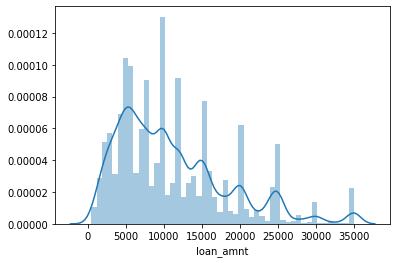

In [52]:
sns.distplot(loan.loan_amnt)

-  The applied loan amount distribution is slightly __right-skewed__ with mean greater than the median. Most of the loans granted are below 25k (75 percentile value)
- Funding amounts see a spike around each 5000 boundary.

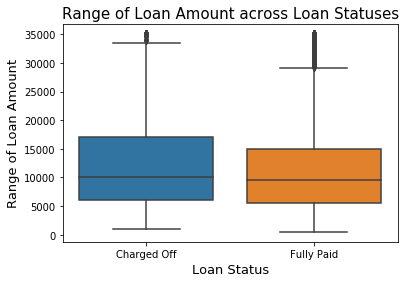

In [53]:
sns.boxplot(loan.loan_status, loan.loan_amnt)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Loan Amount',size=13)
plt.title('Range of Loan Amount across Loan Statuses',size=15);
plt.show()

We can see that most of the loan in the charged off category has loan amount between **5k to 20k.** 

**Boxplot analysis of Total Payment across loan statuses**

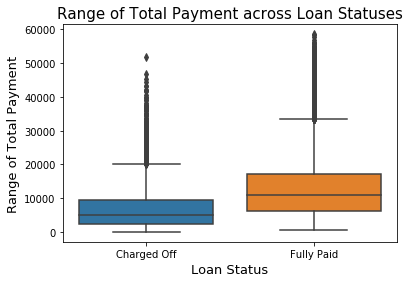

In [54]:
sns.boxplot(loan.loan_status, loan.total_pymnt)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Total Payment',size=13)
plt.title('Range of Total Payment across Loan Statuses',size=15);
plt.show()

Total payment of charged off loans is lower than fully paid loans, as can be seen in boxplots. 
This does not tell us if total payment has any impact on defaults so lets analyze further.

Analyzing **delinq_2yrs** column

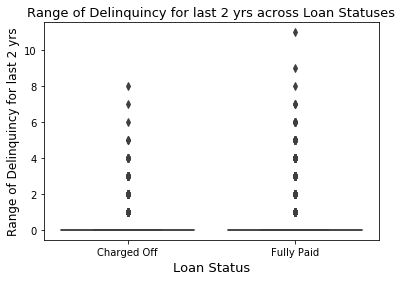

In [55]:
sns.boxplot(loan.loan_status, loan.delinq_2yrs)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Delinquincy for last 2 yrs',size=12)
plt.title('Range of Delinquincy for last 2 yrs across Loan Statuses',size=13);
plt.show()

Analyzing **inq_last_6mths** column

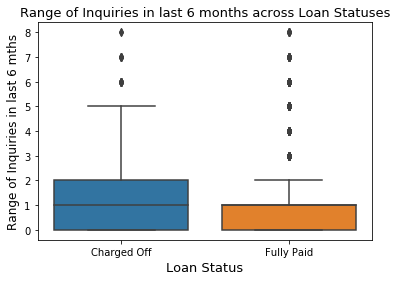

In [56]:
sns.boxplot(loan.loan_status, loan.inq_last_6mths)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Inquiries in last 6 mths',size=12)
plt.title('Range of Inquiries in last 6 months across Loan Statuses',size=13);
plt.show()

Conclusion-
#### Hence it can be seen that there are more number of inquiries for charged_off as compared to fully paid and hence  if there are more than 1 inquiries then the customer is likely to default

Analyzing **revol_bal** column

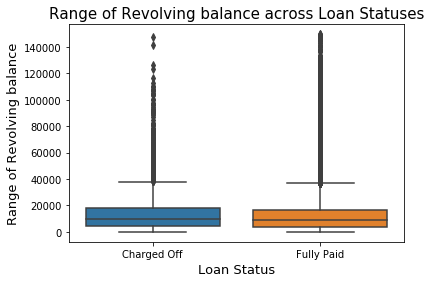

In [57]:
sns.boxplot(loan.loan_status, loan.revol_bal)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Revolving balance',size=13)
plt.title('Range of Revolving balance across Loan Statuses',size=15);
plt.show()
plt.show()

Analyzing **revol_util** column

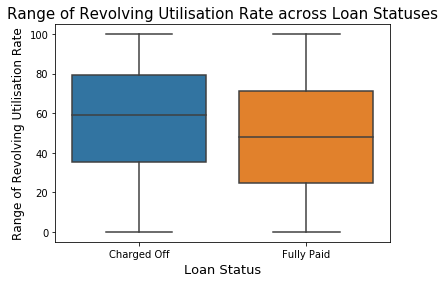

In [58]:
sns.boxplot(loan.loan_status, loan.revol_util)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Revolving Utilisation Rate',size=12)
plt.title('Range of Revolving Utilisation Rate across Loan Statuses',size=15);
plt.show()

Conclusion-
#### It can be seen that the utilisation rate is higher in charged off as compared to fully paid

Analyzing **int_rate** column

<function matplotlib.pyplot.show(*args, **kw)>

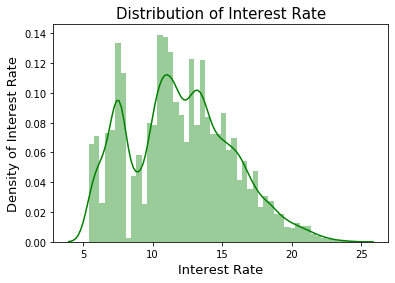

In [59]:
sns.distplot(loan.int_rate, color="g")
plt.xlabel('Interest Rate',size=13)
plt.ylabel('Density of Interest Rate',size=13)
plt.title('Distribution of Interest Rate',size=15);
plt.show

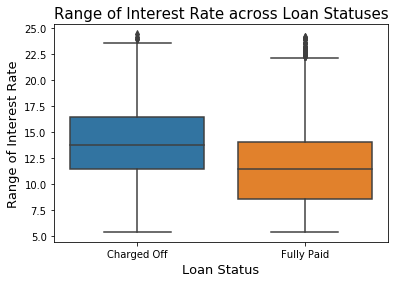

In [60]:
sns.boxplot(loan.loan_status, loan.int_rate)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Interest Rate',size=13)
plt.title('Range of Interest Rate across Loan Statuses',size=15);
plt.show()

#### It is evident from the plot above that Interest rate of charged off loans is higher than fully paid.

Analyzing **annual_inc** column

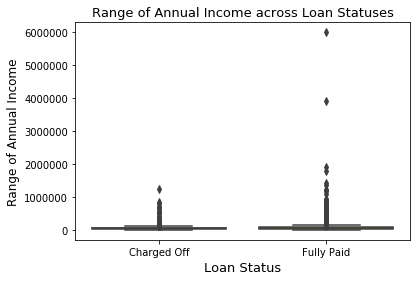

In [61]:
sns.boxplot(loan.loan_status, loan.annual_inc)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of Annual Income',size=12)
plt.title('Range of Annual Income across Loan Statuses',size=13);
plt.show()

#### It is evident from the plot above that charged off loan borrowers annual income range is lower as compared to fully paid and hence could be a possible reason for defaults.

Analyzing **dti** column

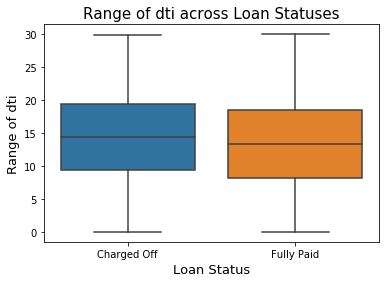

In [62]:
sns.boxplot(loan.loan_status, loan.dti)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of dti',size=13)
plt.title('Range of dti across Loan Statuses',size=15);
plt.show()

As observed in the above plot there is slight difference in dti for fully paid vs charged off loans.Hence it needs to be analysed further.

Analyzing **open_acc** column

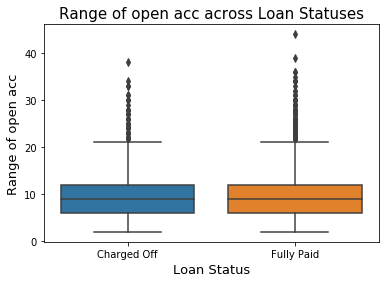

In [63]:
sns.boxplot(loan.loan_status, loan.open_acc)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of open acc',size=13)
plt.title('Range of open acc across Loan Statuses',size=15);
plt.show()

#### In the plot above not much variation can seen between the fully paid vs charged off loans.

Analyzing **total_acc** column

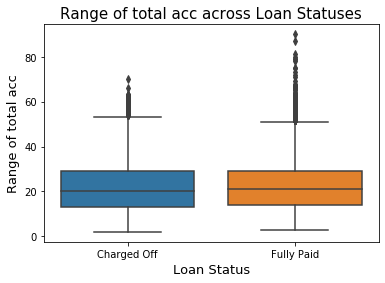

In [64]:
sns.boxplot(loan.loan_status, loan.total_acc)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of total acc',size=13)
plt.title('Range of total acc across Loan Statuses',size=15);
plt.show()

#### In the plot above not much variation can seen between the fully paid vs charged off loans.

> _Deriving new column **open acc/total acc** for clarity_

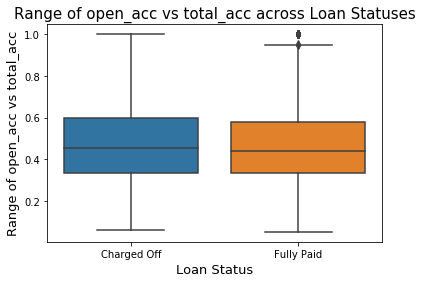

In [65]:
#Deriving new column open acc/total acc for clarity

sns.boxplot(loan.loan_status, loan.open_acc/loan.total_acc)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Range of open_acc vs total_acc',size=13)
plt.title('Range of open_acc vs total_acc across Loan Statuses',size=15);
plt.show()

#### In the plot above not much variation can seen between the fully paid vs charged off loans.

Analyzing **total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp_inv** column although they are not useful for the ongoing analysis as they are more of the customer behaviour attributes

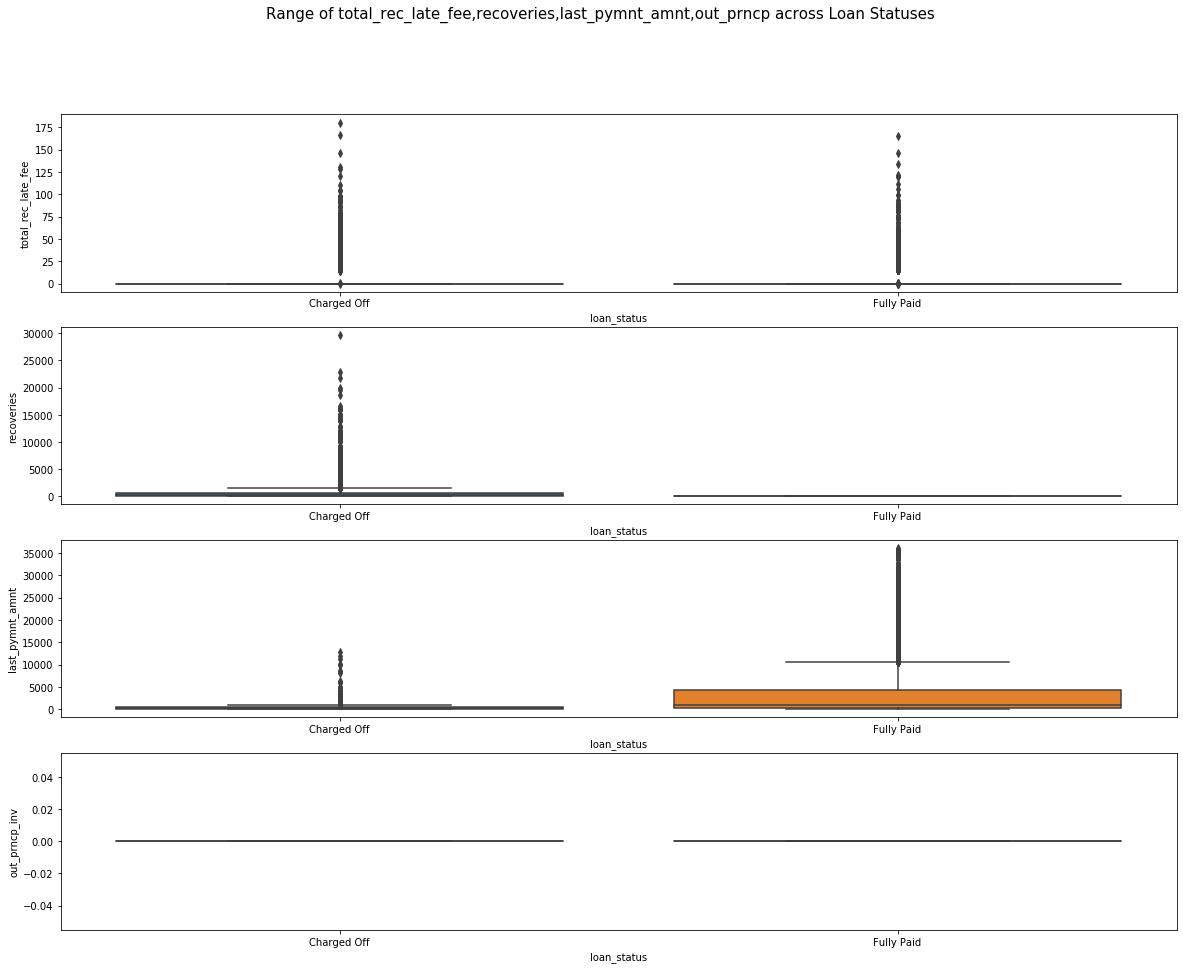

In [66]:
#total_rec_late_fee
#recoveries,collection_recovery_fee
#last_pymnt_amnt
#out_prncp_out_prncp_inv
f,ax = plt.subplots(4,1,figsize=[20,15])

sns.boxplot(loan.loan_status,loan.total_rec_late_fee,ax=ax[0])
sns.boxplot(loan.loan_status,loan.recoveries,ax=ax[1])
sns.boxplot(loan.loan_status,loan.last_pymnt_amnt,ax=ax[2])
sns.boxplot(loan.loan_status,loan.out_prncp_inv,ax=ax[3])
plt.suptitle('Range of total_rec_late_fee,recoveries,last_pymnt_amnt,out_prncp across Loan Statuses',size=15);
plt.show()


### Categorical Variables

> #### Term across loan status

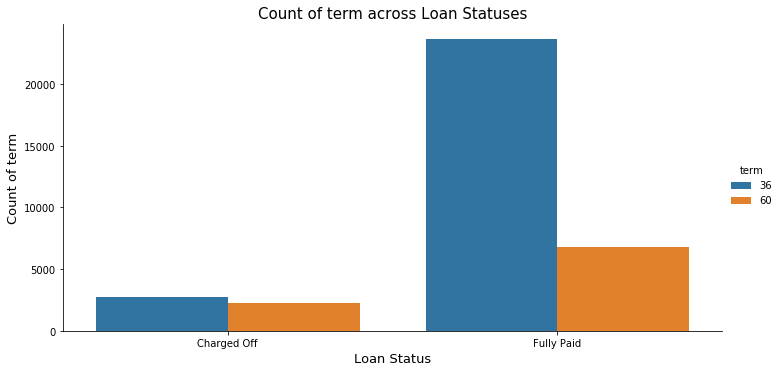

In [67]:
#Term
sns.factorplot('loan_status',hue='term',data =loan,kind='count',aspect=2)
plt.xlabel('Loan Status',size=13)
plt.ylabel('Count of term',size=13)
plt.title('Count of term across Loan Statuses',size=15);
plt.show()


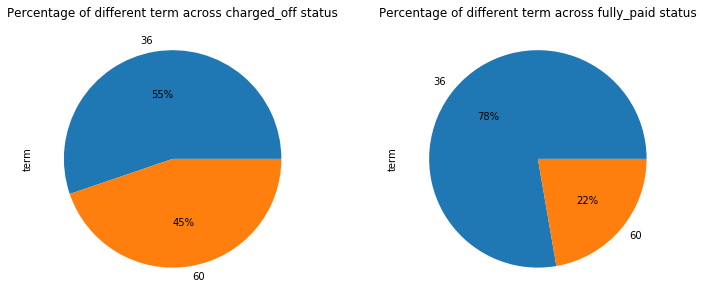

In [68]:
f,ax =plt.subplots(1,2,figsize=[12,5])
ax[0].title.set_text('Percentage of different term across charged_off status')
ax[1].title.set_text('Percentage of different term across fully_paid status')
charged_off['term'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['term'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
plt.show()

Conclusion-

**Its evident that most of those who paid the loan completely had 36 months term and very less percentage had 60 months term. Whereas the defaulters had almost equal share of both.
Hence as the term increases from 36-60 months people tend to default more.**

> #### Grade

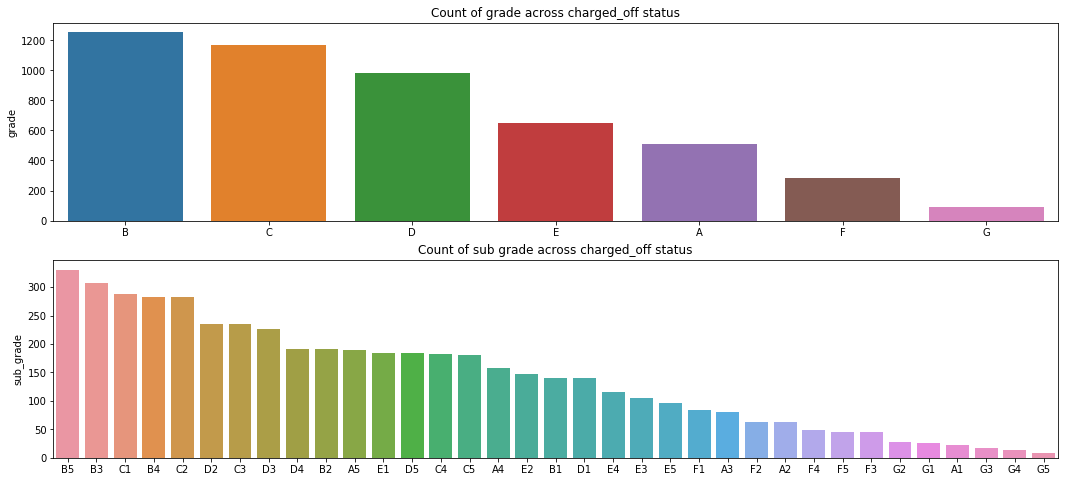

In [69]:
#Grade
f,ax = plt.subplots(2,1,figsize=(18,8))
sns.barplot(charged_off.grade.value_counts().index,charged_off.grade.value_counts(),ax=ax[0])
sns.barplot(charged_off.sub_grade.value_counts().index,charged_off.sub_grade.value_counts(),ax=ax[1])
ax[0].title.set_text('Count of grade across charged_off status')
ax[1].title.set_text('Count of sub grade across charged_off status')
plt.show()

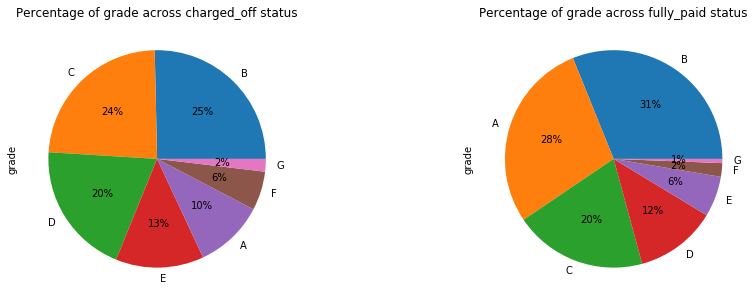

In [70]:
f,ax =plt.subplots(1,2,figsize=[15,5])
charged_off['grade'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['grade'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].title.set_text('Percentage of grade across charged_off status')
ax[1].title.set_text('Percentage of grade across fully_paid status')
plt.show()

Conclusion-

#### The above plots show that Charged_off constituted higher percentage of the lower grades as compared to fully_paid loans.


>  #### emp_length

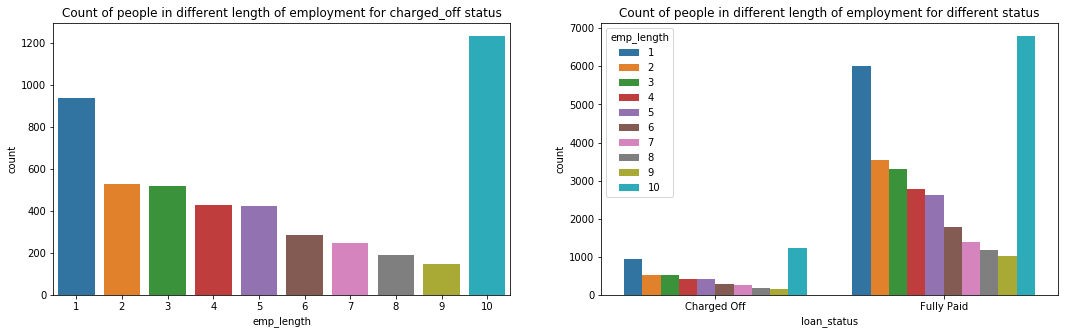

In [71]:
#emp_length
f,ax = plt.subplots(1,2,figsize=(18,5))
sns.countplot('emp_length',data=charged_off,ax=ax[0])
sns.countplot('loan_status', hue='emp_length',data=loan,ax=ax[1])
ax[0].set_title('Count of people in different length of employment for charged_off status')
ax[1].set_title('Count of people in different length of employment for different status')
plt.show()

It can be seen that people with less than 1 year of experience and more than or equal to 10 years of experience apply more for the loans as compared to the people having experience between 1- 10.But this needs to be compared with other factors as it alone cannot be classified as the driving factor since its showing similar trend for both defaulters and people who paid the loans completely.

> #### home_ownership

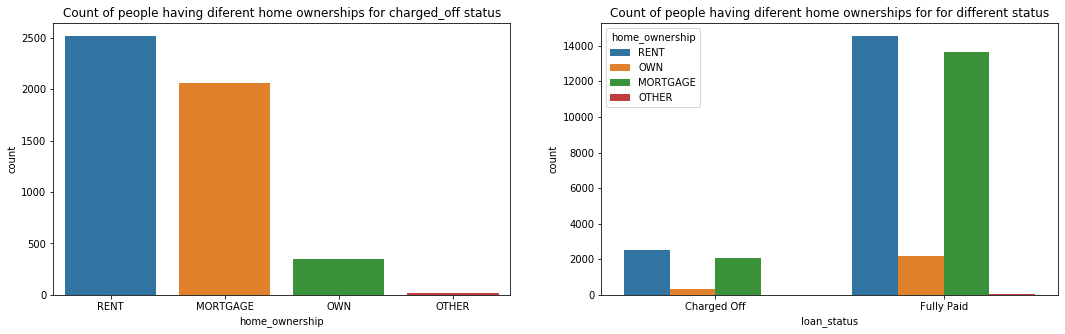

In [72]:
#home_ownership
f,ax = plt.subplots(1,2,figsize=(18,5))
sns.countplot('home_ownership',data=charged_off,ax=ax[0])
sns.countplot('loan_status', hue='home_ownership',data=loan,ax=ax[1])
ax[0].set_title('Count of people having diferent home ownerships for charged_off status')
ax[1].set_title('Count of people having diferent home ownerships for for different status')
plt.show()


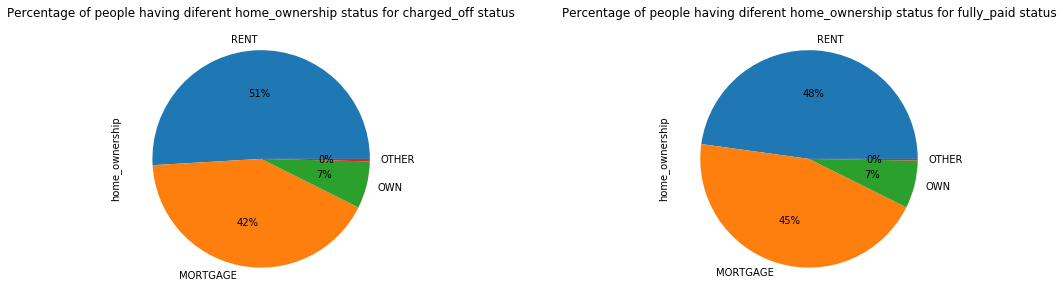

In [73]:
f,ax =plt.subplots(1,2,figsize=[18,5])
charged_off['home_ownership'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['home_ownership'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].set_title('Percentage of people having diferent home_ownership status for charged_off status')
ax[1].set_title('Percentage of people having diferent home_ownership status for fully_paid status')
plt.show()

Conclusion-

**The above plot shows similar trend for both the defaulters and people who paid the loans completely and hence home ownership criteria may not be the indicator for lending club to identify the defaulters.**

> #### Verification Status

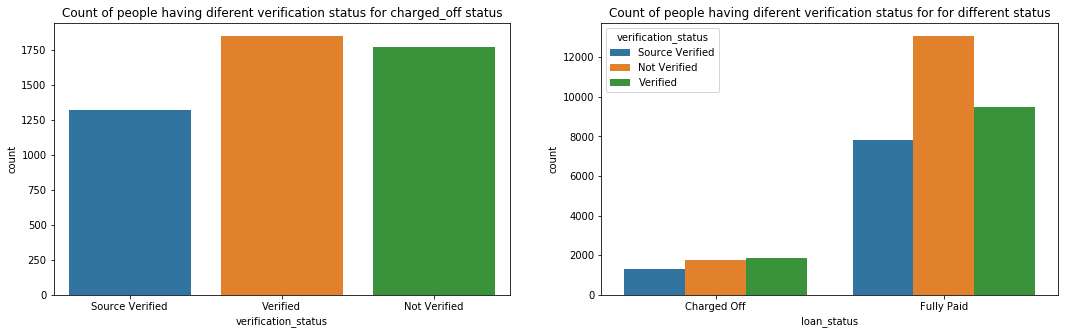

In [74]:
#Verification Status
f,ax = plt.subplots(1,2,figsize=(18,5))
sns.countplot('verification_status',data=charged_off,ax=ax[0])
sns.countplot('loan_status', hue='verification_status',data=loan,ax=ax[1])
ax[0].set_title('Count of people having diferent verification status for charged_off status')
ax[1].set_title('Count of people having diferent verification status for for different status')
plt.show()

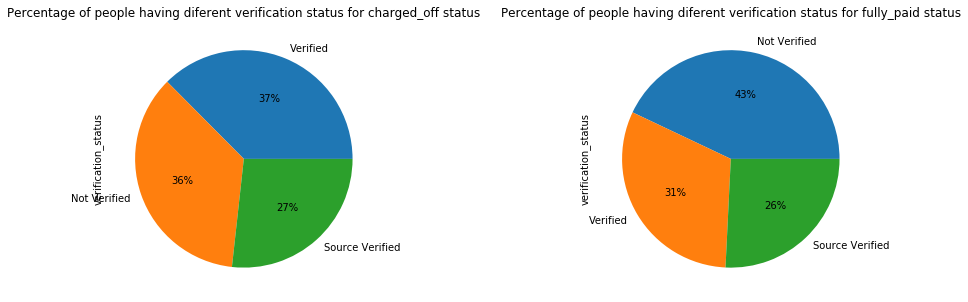

In [75]:
f,ax =plt.subplots(1,2,figsize=[16,5])
charged_off['verification_status'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['verification_status'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].set_title('Percentage of people having diferent verification status for charged_off status')
ax[1].set_title('Percentage of people having diferent verification status for fully_paid status')
plt.show()

Conclusion-

**Here, we can see that among the charged off loans verified ones are the highest defaulters.
This is not surprising as LC would be verifying risky identified loans and thus more verified ones tend to default more.
This is not a key driver of loan defaults.**

> #### #delinq_2yrs

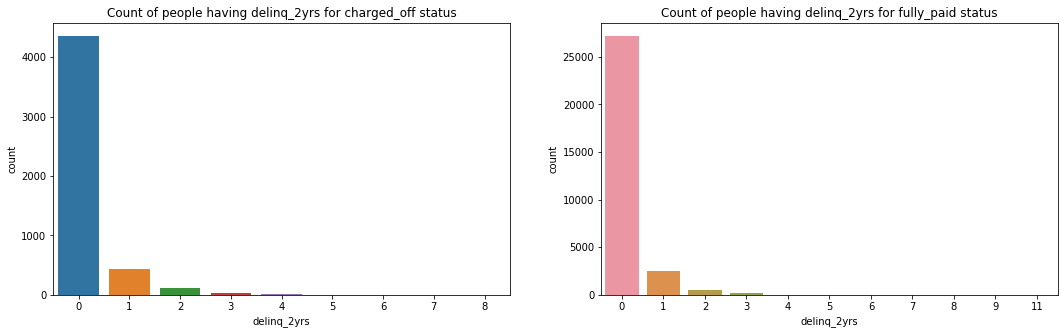

In [76]:
#delinq_2yrs
f,ax= plt.subplots(1,2,figsize=[18,5])
sns.countplot('delinq_2yrs', data=charged_off,ax=ax[0])
sns.countplot('delinq_2yrs', data=fully_paid,ax=ax[1])
ax[0].set_title('Count of people having delinq_2yrs for charged_off status')
ax[1].set_title('Count of people having delinq_2yrs for fully_paid status')
plt.show()


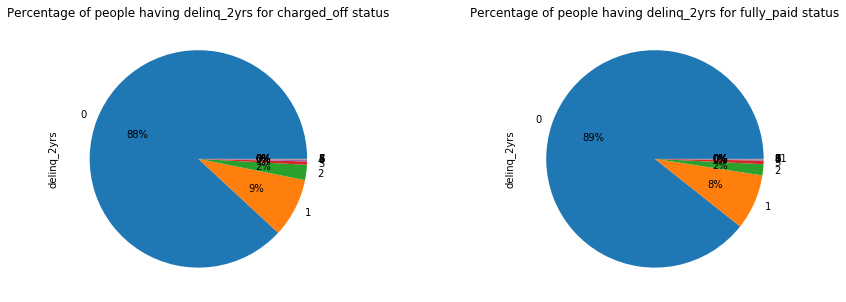

In [77]:
f,ax =plt.subplots(1,2,figsize=[15,5])
charged_off['delinq_2yrs'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['delinq_2yrs'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].set_title('Percentage of people having delinq_2yrs for charged_off status')
ax[1].set_title('Percentage of people having delinq_2yrs for fully_paid status')
plt.show()

Conclusion-

**As the distribution of delinq_2yrs is similar for both charged off and fully paid loan statuses, we can conclude that it is not a driving factor for loan defaults.**

> #### issue_d

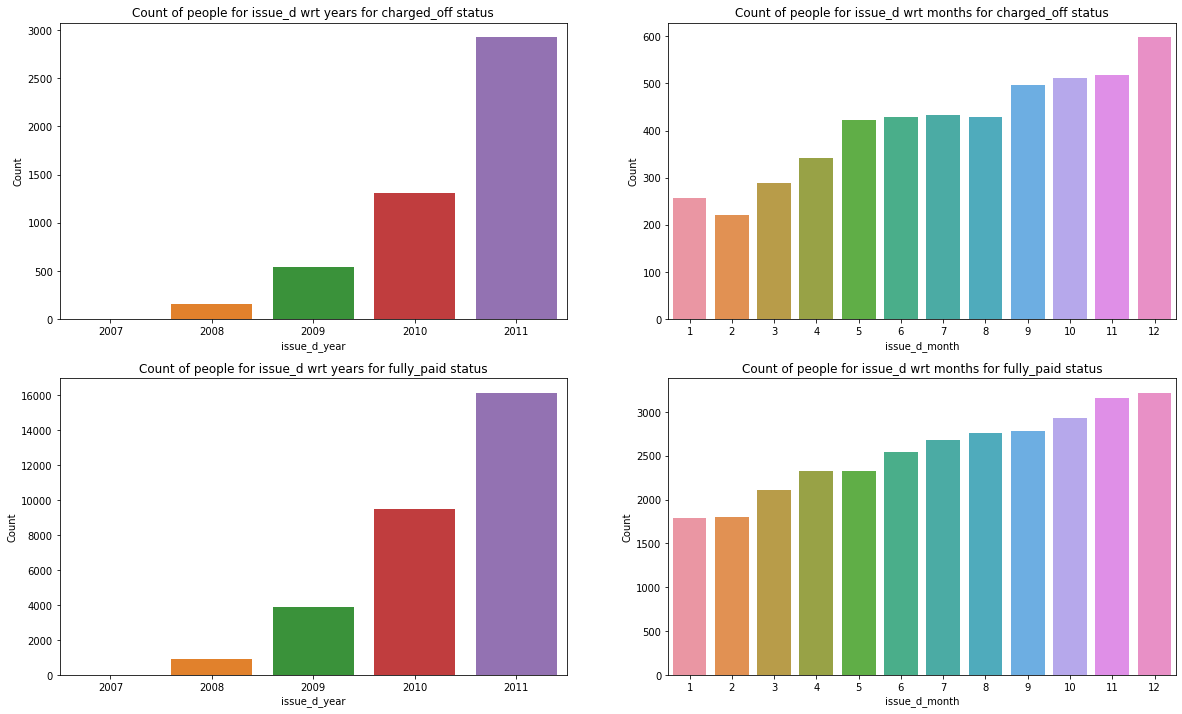

In [78]:
#issue_d
f,ax = plt.subplots(2,2,figsize=(20,12))
sns.barplot(charged_off.issue_d.dt.year.value_counts().index,charged_off.issue_d.dt.year.value_counts(),ax=ax[0,0])
sns.barplot(charged_off.issue_d.dt.month.value_counts().index,charged_off.issue_d.dt.month.value_counts(),ax=ax[0,1])
sns.barplot(fully_paid.issue_d.dt.year.value_counts().index,fully_paid.issue_d.dt.year.value_counts(),ax=ax[1,0])
sns.barplot(fully_paid.issue_d.dt.month.value_counts().index,fully_paid.issue_d.dt.month.value_counts(),ax=ax[1,1])
ax[0,0].set_title('Count of people for issue_d wrt years for charged_off status')
ax[0,1].set_title('Count of people for issue_d wrt months for charged_off status')
ax[1,0].set_title('Count of people for issue_d wrt years for fully_paid status')
ax[1,1].set_title('Count of people for issue_d wrt months for fully_paid status')
ax[0,0].set(xlabel='issue_d_year', ylabel='Count')
ax[0,1].set(xlabel='issue_d_month', ylabel='Count')
ax[1,0].set(xlabel='issue_d_year', ylabel='Count')
ax[1,1].set(xlabel='issue_d_month', ylabel='Count')
plt.show()

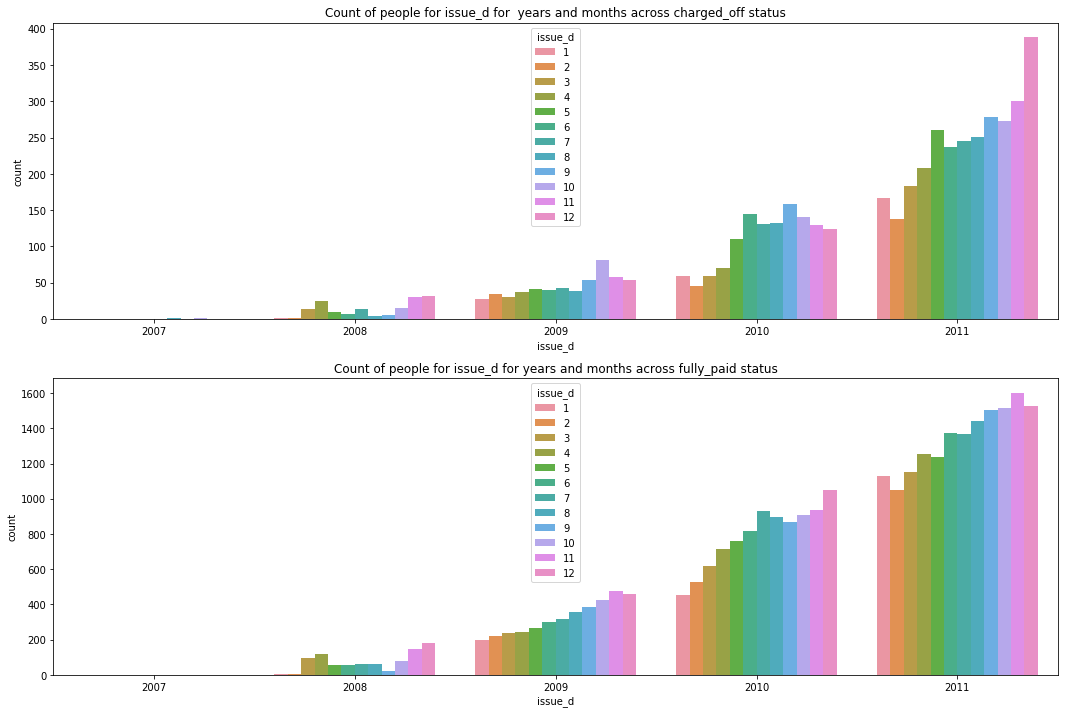

In [79]:
fig,ax = plt.subplots(2,1,figsize=(18,12))
sns.countplot(charged_off.issue_d.dt.year,hue=charged_off.issue_d.dt.month,ax=ax[0])
sns.countplot(fully_paid.issue_d.dt.year,hue=fully_paid.issue_d.dt.month,ax=ax[1])
ax[0].set_title('Count of people for issue_d for  years and months across charged_off status')
ax[1].set_title('Count of people for issue_d for years and months across fully_paid status')
plt.show()

Conclusion-

**Here, the graph reveals that most of the default happened in 2011 in the last month but the distribution between both loan status is similar thus, it is not a driving factor of loan defaults.**

> #### Purpose

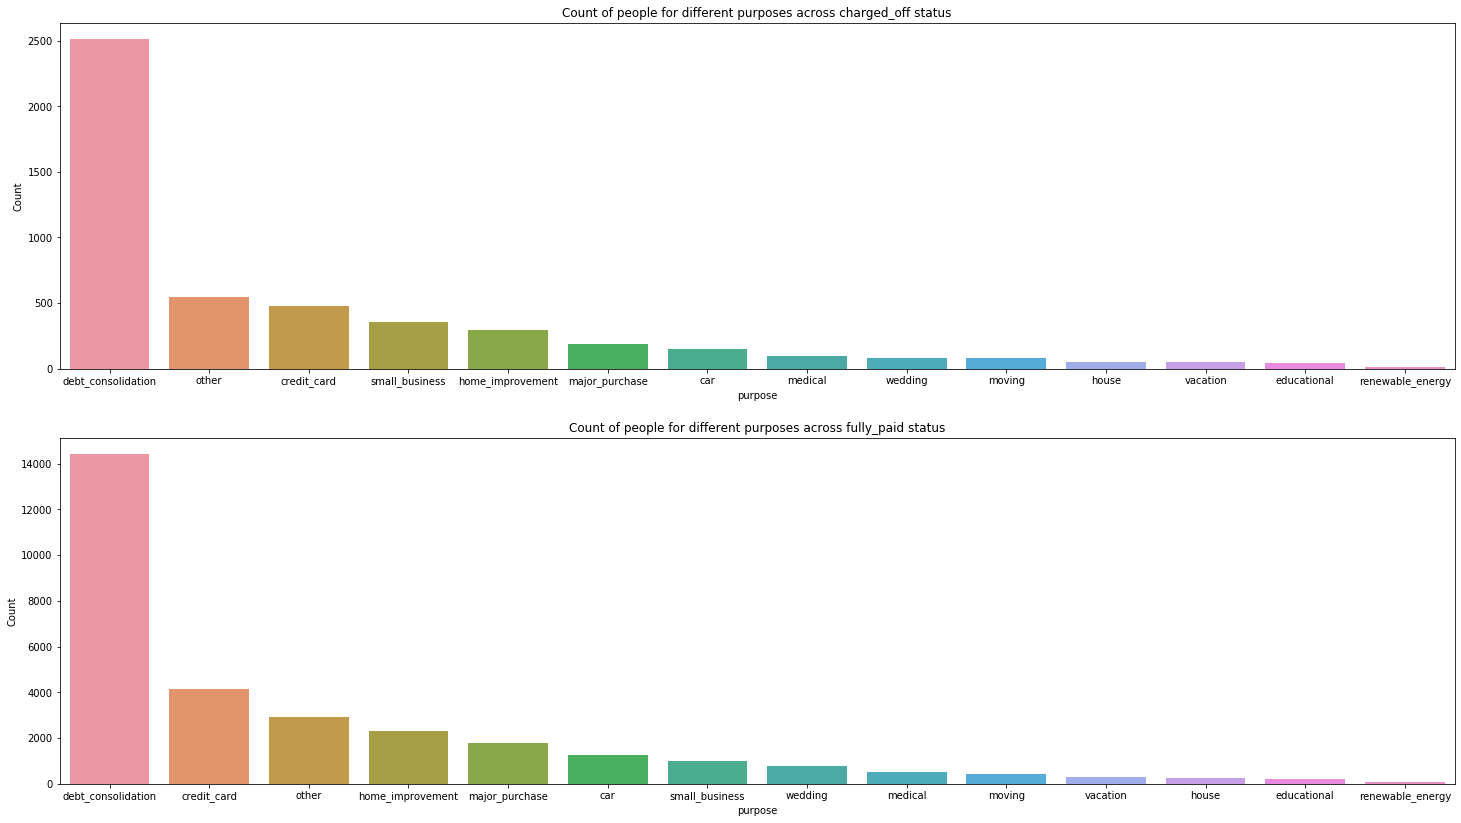

In [80]:
#Purpose
fig,ax =plt.subplots(2,1,figsize=[25,14])
sns.barplot(charged_off.purpose.value_counts().index,charged_off.purpose.value_counts(),ax=ax[0])
sns.barplot(fully_paid.purpose.value_counts().index,fully_paid.purpose.value_counts(),ax=ax[1])
ax[0].set_title('Count of people for different purposes across charged_off status')
ax[1].set_title('Count of people for different purposes across fully_paid status')
ax[0].set(xlabel='purpose', ylabel='Count')
ax[1].set(xlabel='purpose', ylabel='Count')
plt.show()

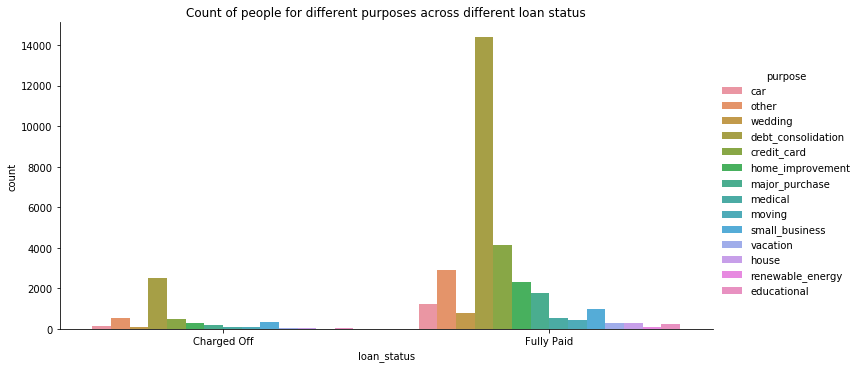

In [81]:
sns.factorplot('loan_status',hue='purpose',kind='count',data=loan,aspect=2)
plt.title('Count of people for different purposes across different loan status')
plt.show()

Conclusion-

**Purpose of loan specified as small_business  has more cases of defaults when compared to fully paid loans but
debt_consolidation remains the major cause of loan defaults but it is also the highest purpose type in fully paid loans.
Hence as the distribution is similar between both loan status  thus purpose is not a driving factor of loan defaults.** 

> #### Zip code

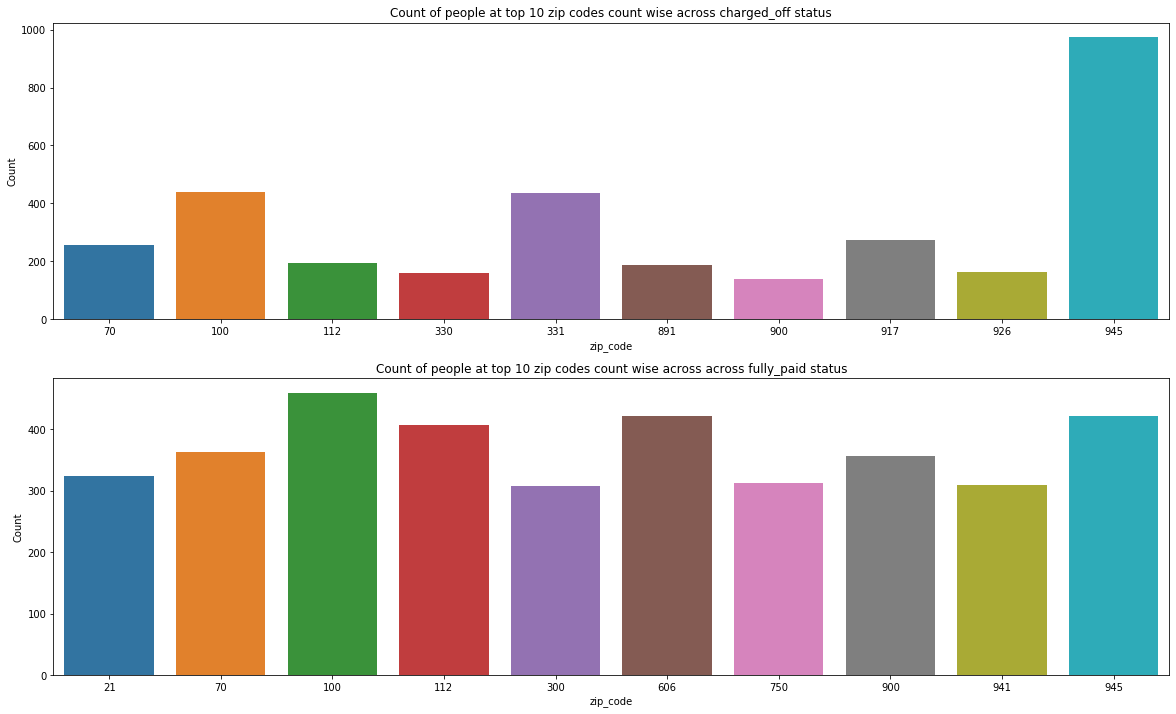

In [82]:
#Zip code
f,ax= plt.subplots(2,1,figsize=[20,12])
sns.barplot(charged_off.zip_code.value_counts().head(10).index,charged_off.addr_state.value_counts().head(10),ax=ax[0])
sns.barplot(fully_paid.zip_code.value_counts().head(10).index,fully_paid.zip_code.value_counts().head(10),ax=ax[1])
ax[0].set_title('Count of people at top 10 zip codes count wise across charged_off status')
ax[1].set_title('Count of people at top 10 zip codes count wise across across fully_paid status')
ax[0].set(xlabel='zip_code', ylabel='Count')
ax[1].set(xlabel='zip_code', ylabel='Count')
plt.show()

Conclusion-

**Zip codes 331 and 926 show some indication of defaults but may be due to more amount of applications accepted from specific regions ans similarly for other zip codes across loan statuses. Hence, we cannot use it as an indicator to identify the defaulters.**

> #### emp_title

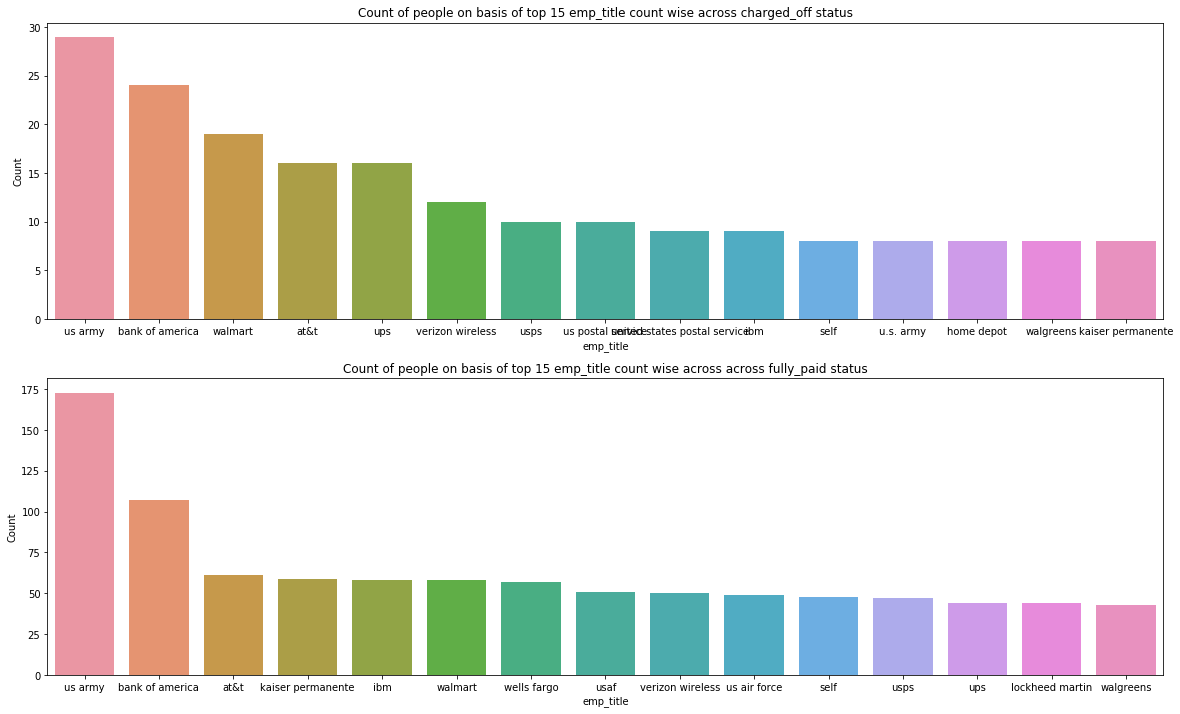

In [83]:
#emp_title
f,ax= plt.subplots(2,1,figsize=[20,12])
sns.barplot(charged_off.emp_title.value_counts().head(15).index,charged_off.emp_title.value_counts().head(15),ax=ax[0])
sns.barplot(fully_paid.emp_title.value_counts().head(15).index,fully_paid.emp_title.value_counts().head(15),ax=ax[1])
ax[0].set_title('Count of people on basis of top 15 emp_title count wise across charged_off status')
ax[1].set_title('Count of people on basis of top 15 emp_title count wise across across fully_paid status')
ax[0].set(xlabel='emp_title', ylabel='Count')
ax[1].set(xlabel='emp_title', ylabel='Count')
plt.show()

Cocnlsuion-

**There is no clear relationship between the defaults and the employer title, thus it cannot be taken as driver of loan defaults.**

> #### title

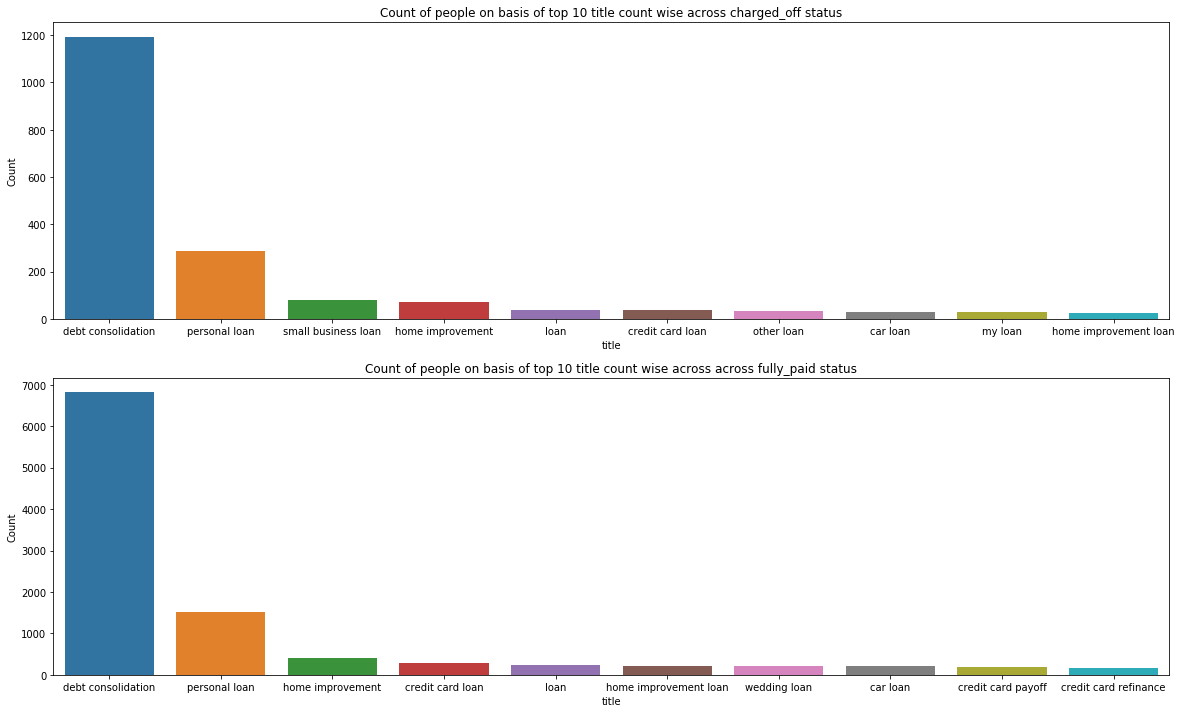

In [84]:
#title
f,ax= plt.subplots(2,1,figsize=[20,12])
sns.barplot(charged_off.title.value_counts().head(10).index,charged_off.title.value_counts().head(10),ax=ax[0])
sns.barplot(fully_paid.title.value_counts().head(10).index,fully_paid.title.value_counts().head(10),ax=ax[1])
ax[0].set_title('Count of people on basis of top 10 title count wise across charged_off status')
ax[1].set_title('Count of people on basis of top 10 title count wise across across fully_paid status')
ax[0].set(xlabel='title', ylabel='Count')
ax[1].set(xlabel='title', ylabel='Count')
plt.show()

Cocnlsuion-

**The findings are very similar to the purpose of loan column and also people who defaulted had simlar pattern as compared to those who paid the loan completely and hence title cannot be used a factor to identify defaulters**

> #### Country

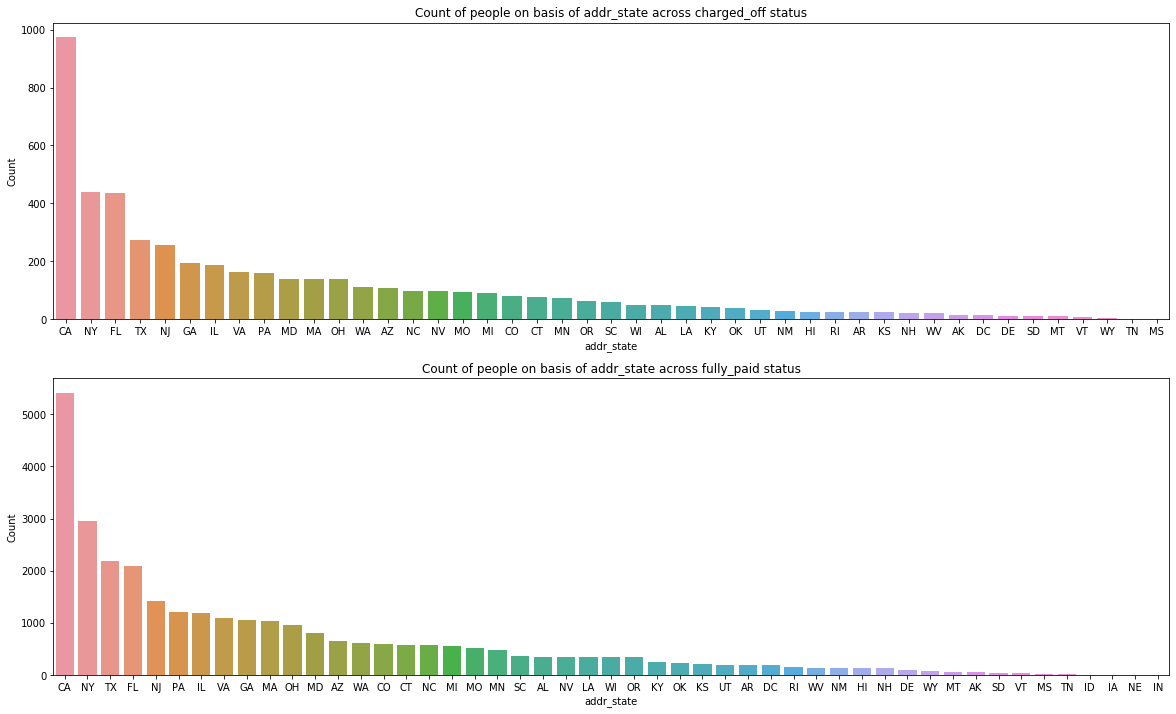

In [85]:
#Country
f,ax= plt.subplots(2,1,figsize=[20,12])
sns.barplot(charged_off.addr_state.value_counts().index,charged_off.addr_state.value_counts(),ax=ax[0])
sns.barplot(fully_paid.addr_state.value_counts().index,fully_paid.addr_state.value_counts(),ax=ax[1])
ax[0].set_title('Count of people on basis of addr_state across charged_off status')
ax[1].set_title('Count of people on basis of addr_state across fully_paid status')
ax[0].set(xlabel='addr_state', ylabel='Count')
ax[1].set(xlabel='addr_state', ylabel='Count')
plt.show()

Conclusion-

**There is no clear relationship between the defaults and the country, thus it cannot be taken as driver of loan defaults.**

> #### earliest_cr_line

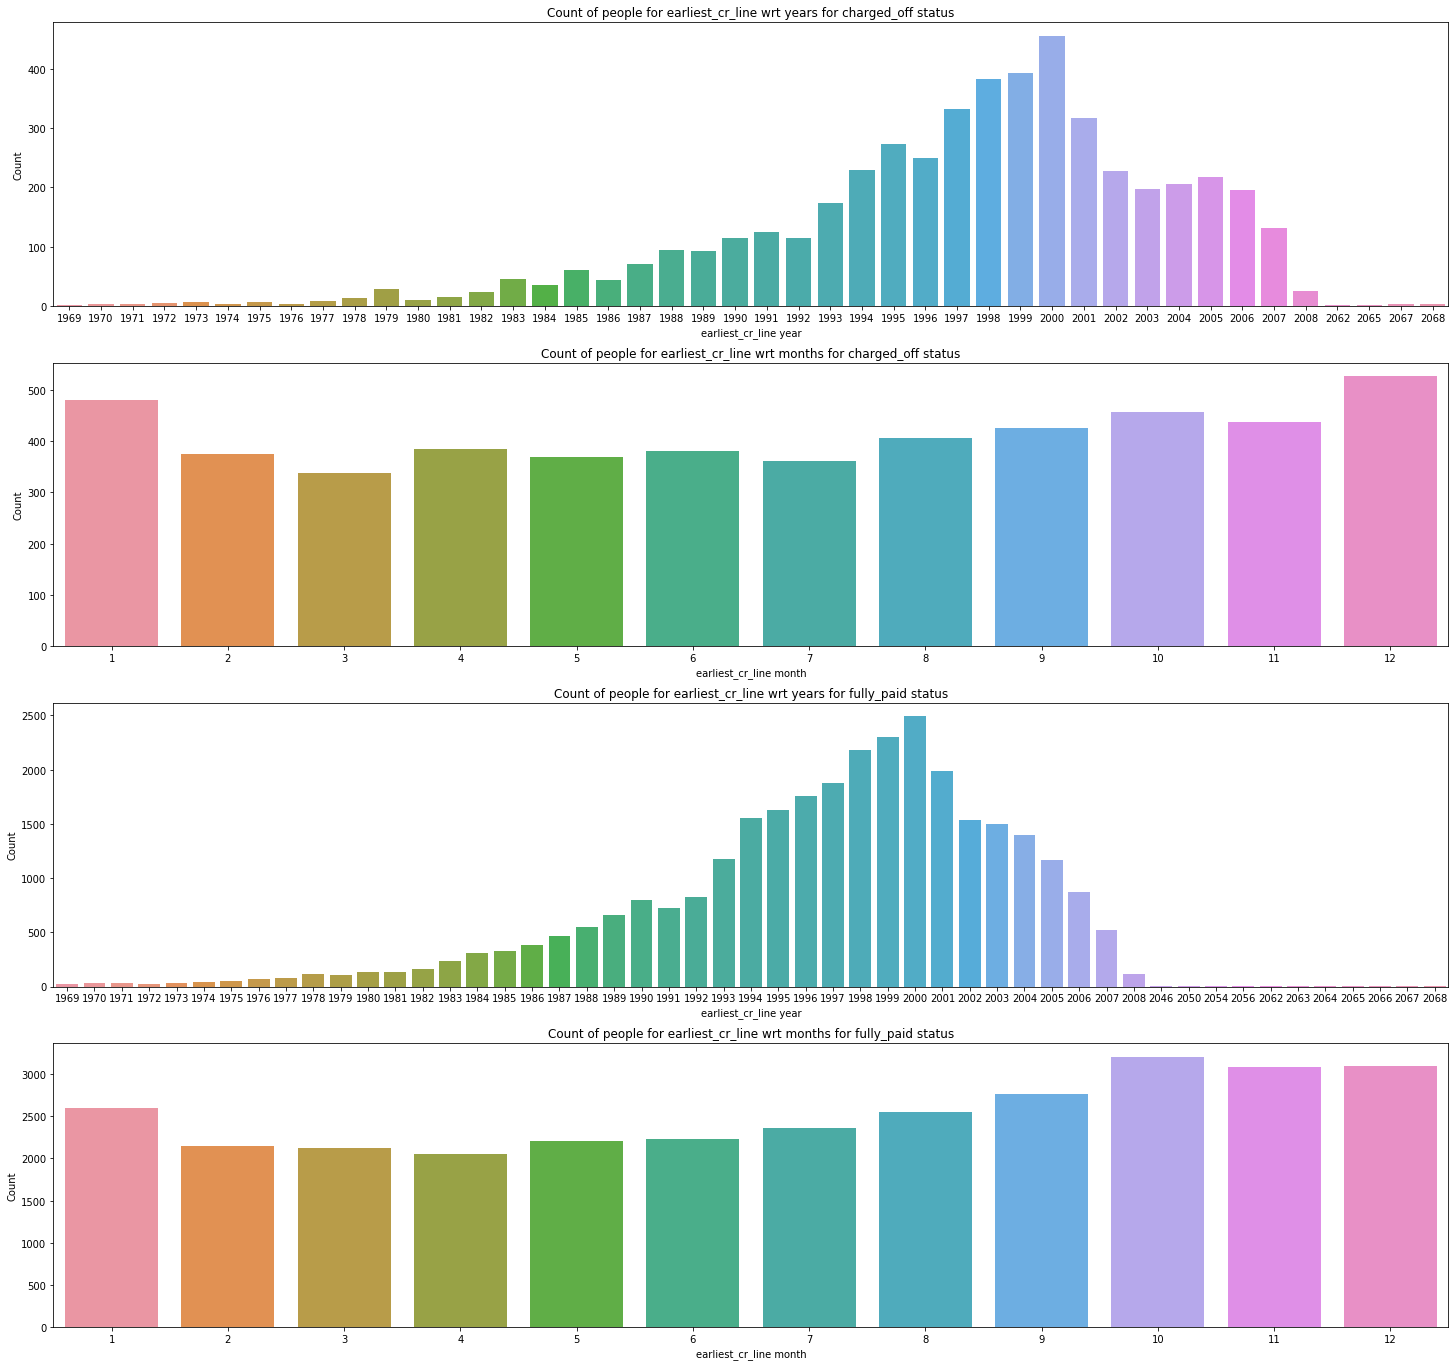

In [86]:
#earliest_cr_line
f,ax = plt.subplots(4,1,figsize=(25,24))
sns.barplot(charged_off.earliest_cr_line.dt.year.value_counts().index,charged_off.earliest_cr_line.dt.year.value_counts(),ax=ax[0])
sns.barplot(charged_off.earliest_cr_line.dt.month.value_counts().index,charged_off.earliest_cr_line.dt.month.value_counts(),ax=ax[1])
sns.barplot(fully_paid.earliest_cr_line.dt.year.value_counts().index,fully_paid.earliest_cr_line.dt.year.value_counts(),ax=ax[2])
sns.barplot(fully_paid.earliest_cr_line.dt.month.value_counts().index,fully_paid.earliest_cr_line.dt.month.value_counts(),ax=ax[3])
ax[0].set_title('Count of people for earliest_cr_line wrt years for charged_off status')
ax[1].set_title('Count of people for earliest_cr_line wrt months for charged_off status')
ax[2].set_title('Count of people for earliest_cr_line wrt years for fully_paid status')
ax[3].set_title('Count of people for earliest_cr_line wrt months for fully_paid status')
ax[0].set(xlabel='earliest_cr_line year', ylabel='Count')
ax[1].set(xlabel='earliest_cr_line month', ylabel='Count')
ax[2].set(xlabel='earliest_cr_line year', ylabel='Count')
ax[3].set(xlabel='earliest_cr_line month', ylabel='Count')
plt.show()

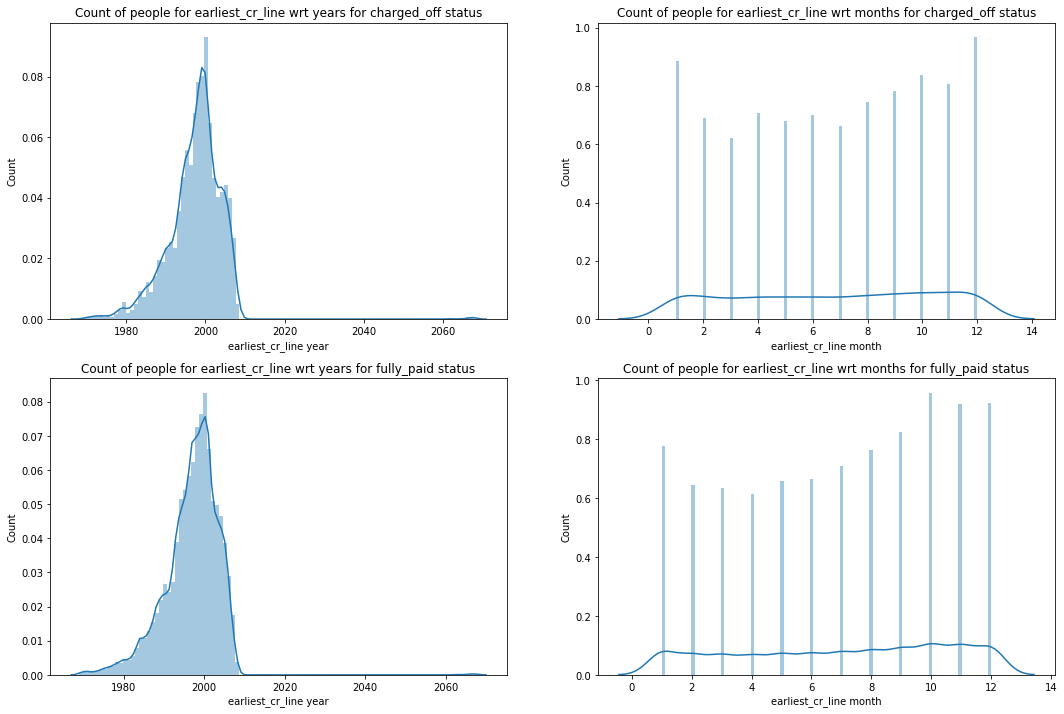

In [87]:
f,ax = plt.subplots(2,2,figsize=(18,12))
sns.distplot(charged_off.earliest_cr_line.dt.year,bins=100,ax=ax[0,0])
sns.distplot(charged_off.earliest_cr_line.dt.month,bins=100,ax=ax[0,1])
sns.distplot(fully_paid.earliest_cr_line.dt.year,bins=100,ax=ax[1,0])
sns.distplot(fully_paid.earliest_cr_line.dt.month,bins=100,ax=ax[1,1])
ax[0,0].set_title('Count of people for earliest_cr_line wrt years for charged_off status')
ax[0,1].set_title('Count of people for earliest_cr_line wrt months for charged_off status')
ax[1,0].set_title('Count of people for earliest_cr_line wrt years for fully_paid status')
ax[1,1].set_title('Count of people for earliest_cr_line wrt months for fully_paid status')
ax[0,0].set(xlabel='earliest_cr_line year', ylabel='Count')
ax[0,1].set(xlabel='earliest_cr_line month', ylabel='Count')
ax[1,0].set(xlabel='earliest_cr_line year', ylabel='Count')
ax[1,1].set(xlabel='earliest_cr_line month', ylabel='Count')
plt.show()

Conclusion-

**The pattern is similar for fully paid and charged off people when compared with he time of opening of the earliest credit line and hence cannot be used as a driving factor.**

> #### pub_rec

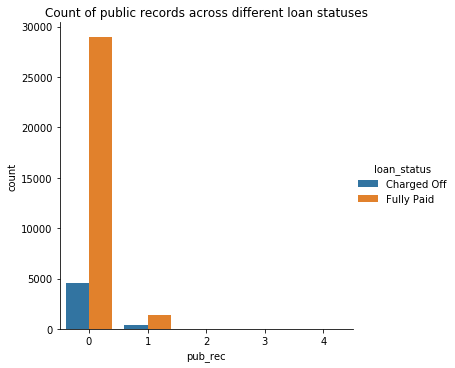

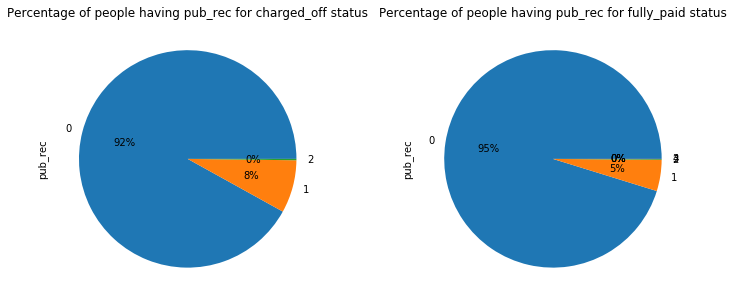

In [88]:
#pub_rec
sns.factorplot('pub_rec',hue='loan_status',kind='count',data=loan)
plt.title('Count of public records across different loan statuses')
plt.show()
f,ax =plt.subplots(1,2,figsize=[12,5])
charged_off['pub_rec'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['pub_rec'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].set_title('Percentage of people having pub_rec for charged_off status')
ax[1].set_title('Percentage of people having pub_rec for fully_paid status')
plt.show()

Cocnlsuion-

**There is no clear relationship between the defaults and the pub_rec and also the pattern is similar for charged off and fully paid , thus it cannot be taken as driver of loan defaults.**

> #### last_pymnt_d

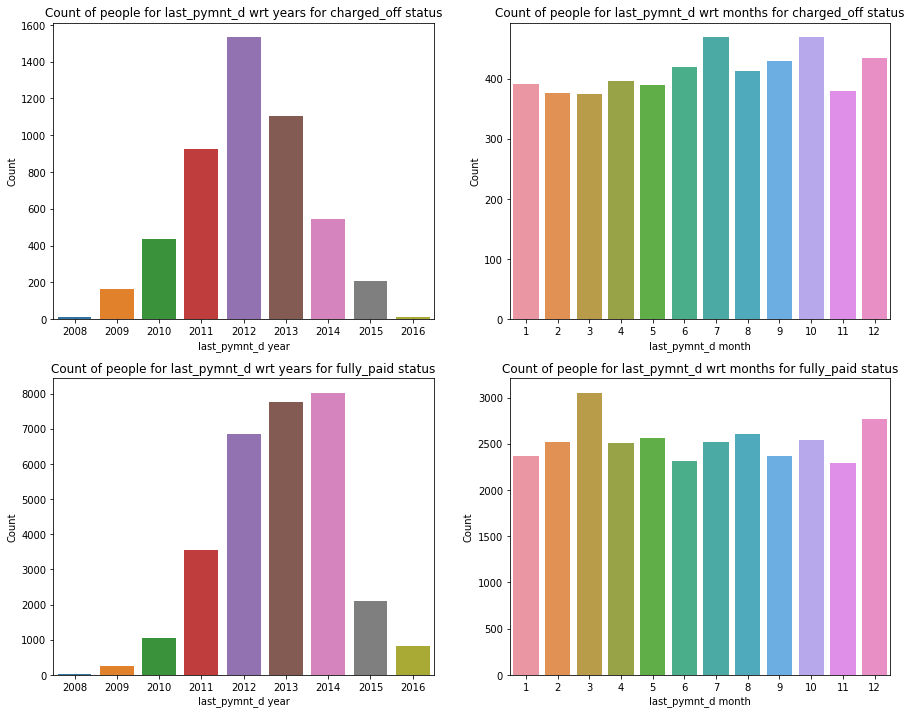

In [89]:
#last_pymnt_d
f,ax = plt.subplots(2,2,figsize=(15,12))
sns.barplot(charged_off.last_pymnt_d.dt.year.value_counts().index,charged_off.last_pymnt_d.dt.year.value_counts(),ax=ax[0,0])
sns.barplot(charged_off.last_pymnt_d.dt.month.value_counts().index,charged_off.last_pymnt_d.dt.month.value_counts(),ax=ax[0,1])
sns.barplot(fully_paid.last_pymnt_d.dt.year.value_counts().index,fully_paid.last_pymnt_d.dt.year.value_counts(),ax=ax[1,0])
sns.barplot(fully_paid.last_pymnt_d.dt.month.value_counts().index,fully_paid.last_pymnt_d.dt.month.value_counts(),ax=ax[1,1])
ax[0,0].set_title('Count of people for last_pymnt_d wrt years for charged_off status')
ax[0,1].set_title('Count of people for last_pymnt_d wrt months for charged_off status')
ax[1,0].set_title('Count of people for last_pymnt_d wrt years for fully_paid status')
ax[1,1].set_title('Count of people for last_pymnt_d wrt months for fully_paid status')
ax[0,0].set(xlabel='last_pymnt_d year', ylabel='Count')
ax[0,1].set(xlabel='last_pymnt_d month', ylabel='Count')
ax[1,0].set(xlabel='last_pymnt_d year', ylabel='Count')
ax[1,1].set(xlabel='last_pymnt_d month', ylabel='Count')
plt.show()

It can be seen that the last payment receiving date happens to be 2012 post which the loan were charged off.

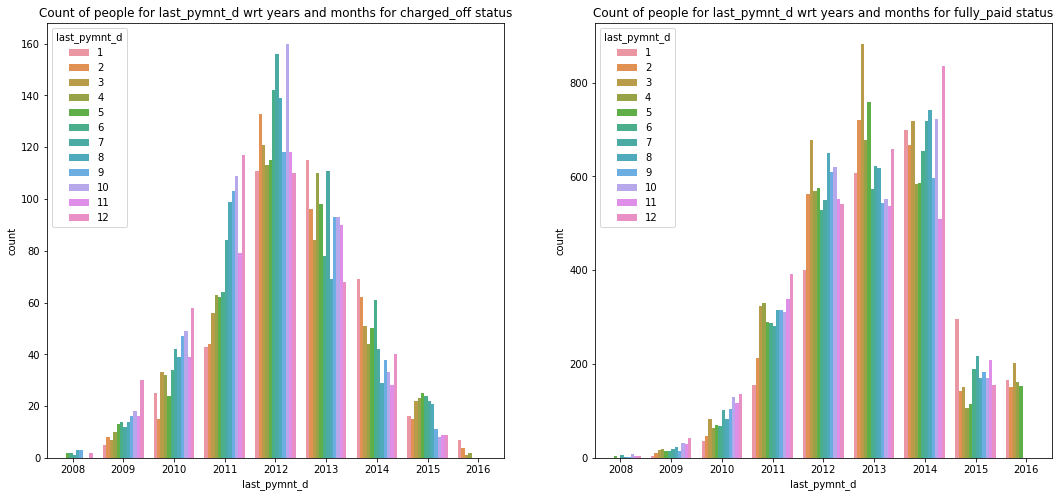

In [90]:
fig,ax = plt.subplots(1,2,figsize=(18, 8))
sns.countplot(charged_off.last_pymnt_d.dt.year,hue=charged_off.last_pymnt_d.dt.month,ax=ax[0])
sns.countplot(fully_paid.last_pymnt_d.dt.year,hue=fully_paid.last_pymnt_d.dt.month ,ax=ax[1])
ax[0].set_title('Count of people for last_pymnt_d wrt years and months for charged_off status')
ax[1].set_title('Count of people for last_pymnt_d wrt years and months for fully_paid status')
plt.show()

Cocnlusion-

**Since this is the customer behavioural attribute hence it cannot be used as a driving factor but it can be observed that defaulters started increasing after 2012 and the payments started decreasing**

> #### last_credit_pull_d

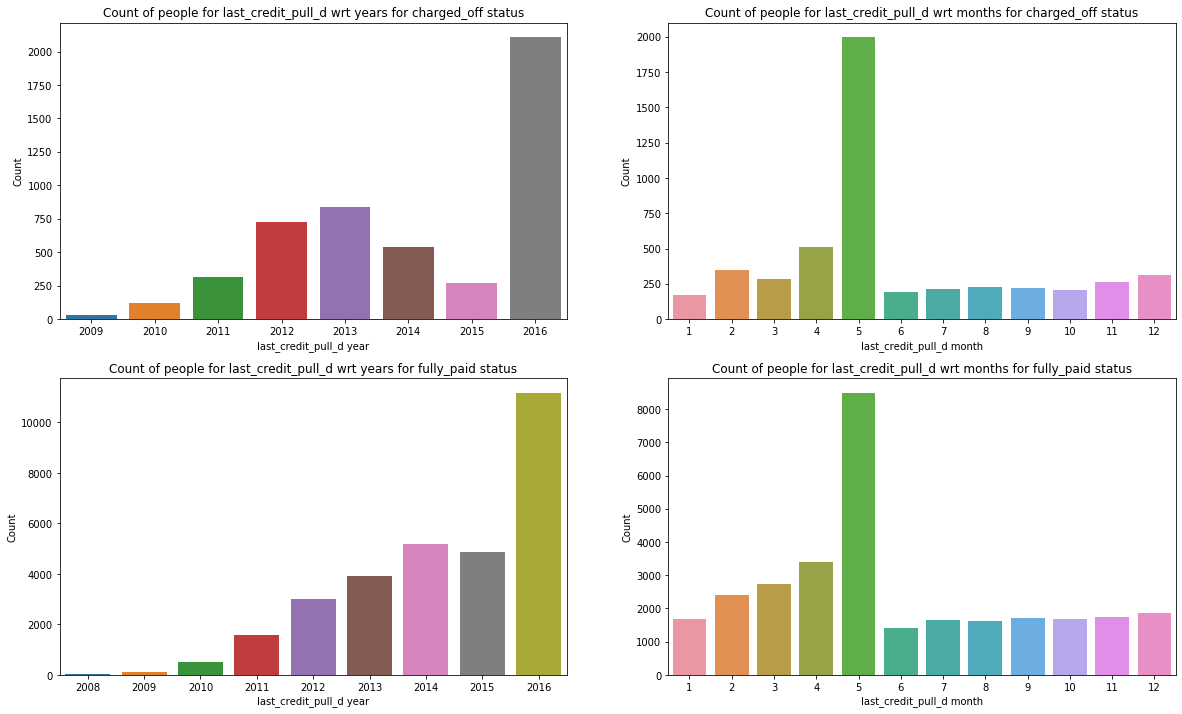

In [91]:
#last_credit_pull_d
f,ax = plt.subplots(2,2,figsize=(20,12))
sns.barplot(charged_off.last_credit_pull_d.dt.year.value_counts().index,charged_off.last_credit_pull_d.dt.year.value_counts(),ax=ax[0,0])
sns.barplot(charged_off.last_credit_pull_d.dt.month.value_counts().index,charged_off.last_credit_pull_d.dt.month.value_counts(),ax=ax[0,1])
sns.barplot(fully_paid.last_credit_pull_d.dt.year.value_counts().index,fully_paid.last_credit_pull_d.dt.year.value_counts(),ax=ax[1,0])
sns.barplot(fully_paid.last_credit_pull_d.dt.month.value_counts().index,fully_paid.last_credit_pull_d.dt.month.value_counts(),ax=ax[1,1])
ax[0,0].set_title('Count of people for last_credit_pull_d wrt years for charged_off status')
ax[0,1].set_title('Count of people for last_credit_pull_d wrt months for charged_off status')
ax[1,0].set_title('Count of people for last_credit_pull_d wrt years for fully_paid status')
ax[1,1].set_title('Count of people for last_credit_pull_d wrt months for fully_paid status')
ax[0,0].set(xlabel='last_credit_pull_d year', ylabel='Count')
ax[0,1].set(xlabel='last_credit_pull_d month', ylabel='Count')
ax[1,0].set(xlabel='last_credit_pull_d year', ylabel='Count')
ax[1,1].set(xlabel='last_credit_pull_d month', ylabel='Count')
plt.show()


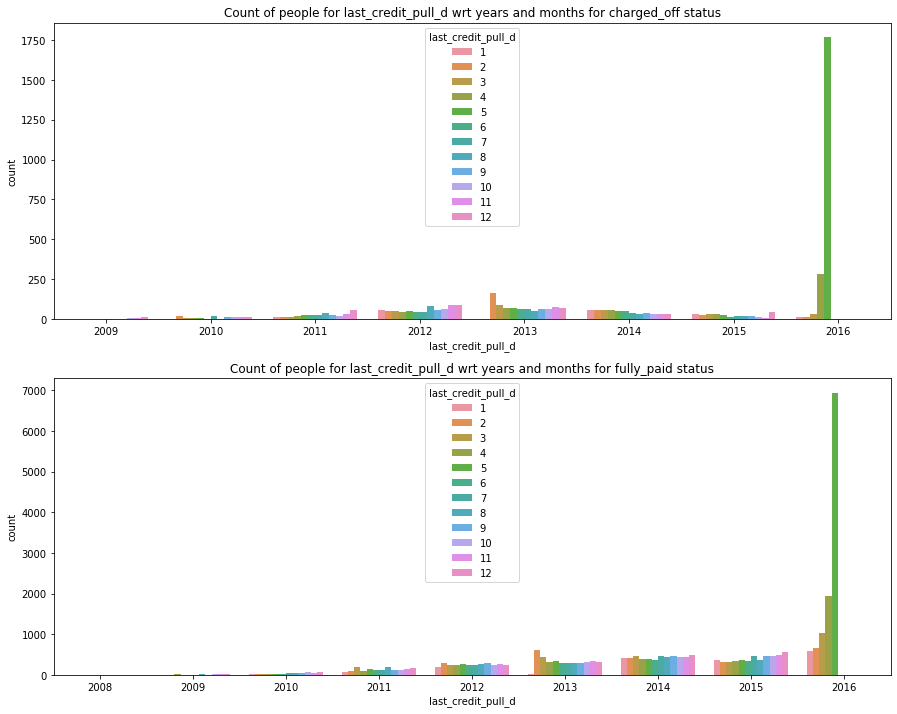

In [92]:
fig,ax = plt.subplots(2,1,figsize=(15, 12))
sns.countplot(charged_off.last_credit_pull_d.dt.year,hue=charged_off.last_credit_pull_d.dt.month,ax=ax[0])
sns.countplot(fully_paid.last_credit_pull_d.dt.year,hue=fully_paid.last_credit_pull_d.dt.month,ax=ax[1])
ax[0].set_title('Count of people for last_credit_pull_d wrt years and months for charged_off status')
ax[1].set_title('Count of people for last_credit_pull_d wrt years and months for fully_paid status')
plt.show()

Conclusion-

**Here we can see the most credit report enquiries are made in the year 2016 and in the month of May.
Although, the distribution is similar thus, this can not be concluded as a driving factor.**

> #### pub_rec_bankruptcies

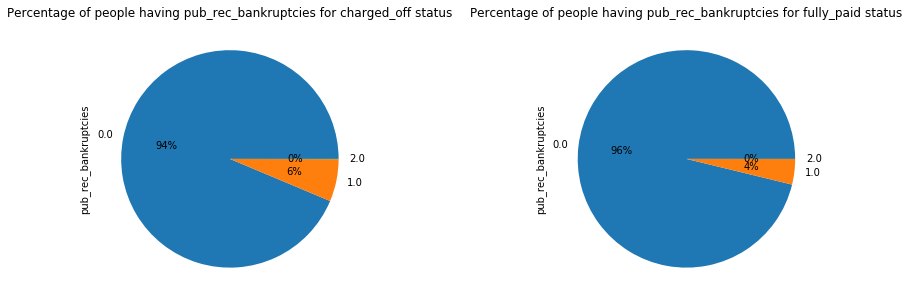

In [93]:
f,ax =plt.subplots(1,2,figsize=[15,5])
charged_off['pub_rec_bankruptcies'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
fully_paid['pub_rec_bankruptcies'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[1])
ax[0].set_title('Percentage of people having pub_rec_bankruptcies for charged_off status')
ax[1].set_title('Percentage of people having pub_rec_bankruptcies for fully_paid status')
plt.show()

Conclusion-

**This is more of customer behavioural attribute and laos has similar pattern across charged off and fully paid and hecne cannot be considered as the driving factor.**

#### Derived Metrics;Bivariate Analysis

In [94]:
loan = loan[loan.loan_status != "Current"]

**Deriving annual income slabs for analysis**

In [95]:
#Deriving annual income slabs for analysis
bins=[0,20000,40000,60000,80000,100000,1000000,2000000,3000000,4000000,5000000,6000000]
names=['<20000','20k-40k','40k-60k','60k-80k','80k-100k','100k-1000k','1000k-2000k','2000k-3000k',\
       '3000k-4000k','4000k-5000k','5000k-6000k']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'],bins,labels=names)
print(loan.annual_inc_range.value_counts())

40k-60k        10454
20k-40k         7609
60k-80k         7163
100k-1000k      5008
80k-100k        4242
<20000           878
1000k-2000k       11
5000k-6000k        1
3000k-4000k        1
4000k-5000k        0
2000k-3000k        0
Name: annual_inc_range, dtype: int64


> #### Employment length vs Annual Income

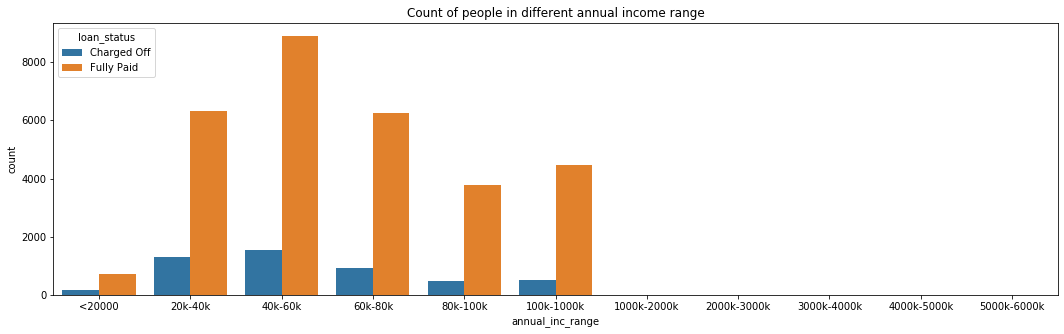

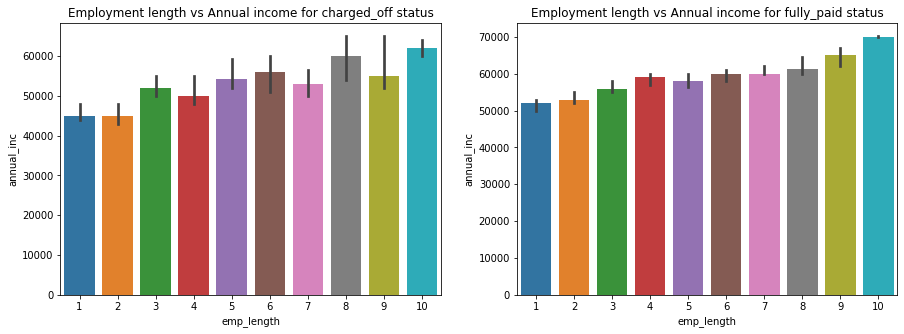

In [96]:
f = plt.subplots(figsize=(18,5))
sns.countplot('annual_inc_range',hue='loan_status',data=loan)
plt.title('Count of people in different annual income range')
plt.show()
fig,ax = plt.subplots(1,2, figsize=(15, 5))
sns.barplot(x='emp_length',y='annual_inc',data=charged_off,estimator=np.median,ax=ax[0])
sns.barplot(x='emp_length',y='annual_inc',data=fully_paid,estimator=np.median,ax=ax[1])
ax[0].set_title('Employment length vs Annual income for charged_off status')
ax[1].set_title('Employment length vs Annual income for fully_paid status')
plt.show()

Conclusion-
The following points can be observed in the plots above:
   1. Most of the loan charged off were taken by borrowers in low income groups.
   2. For charged off loans emp_length is not a driving factor of defaults.
    

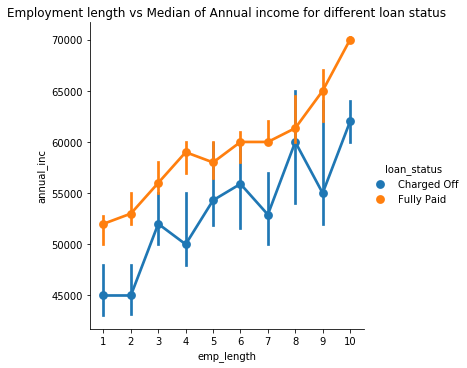

In [97]:
sns.factorplot('emp_length','annual_inc',hue='loan_status',data=loan,estimator=np.median)
plt.title('Employment length vs Median of Annual income for different loan status')
plt.show()

Conclusion-
**It can be seen median salaries are lower for charged off when compared to emp length and hence person has higher chances to default if the annual income is not comparable to the length of employment. Hence, annual income is an important factor of assessment**

> #### Annual Income vs Loan Amount for Charged off

<Figure size 864x576 with 0 Axes>

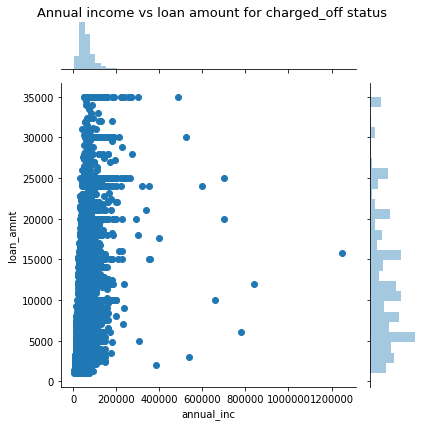

In [98]:
f= plt.figure(figsize=[12,8])
p= sns.jointplot('annual_inc','loan_amnt',data=charged_off)
p.fig.suptitle("Annual income vs loan amount for charged_off status",size=13)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)


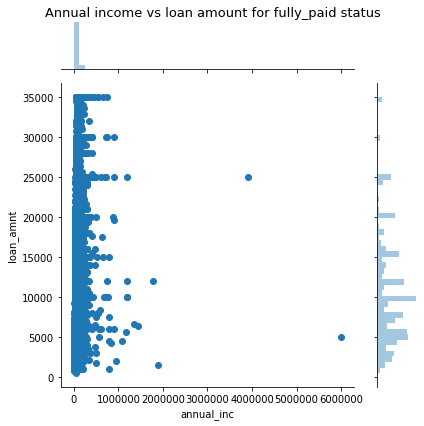

In [99]:
p= sns.jointplot('annual_inc','loan_amnt',data=fully_paid)
p.fig.suptitle("Annual income vs loan amount for fully_paid status",size=13)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) 

Conclusion-

**The annual income range is 0- 2 lacs in charged off as compared to 0- 10 lacs in fully paid for the requested loan amount.**


> #### Annual income range vs loan amount for different loan statuses

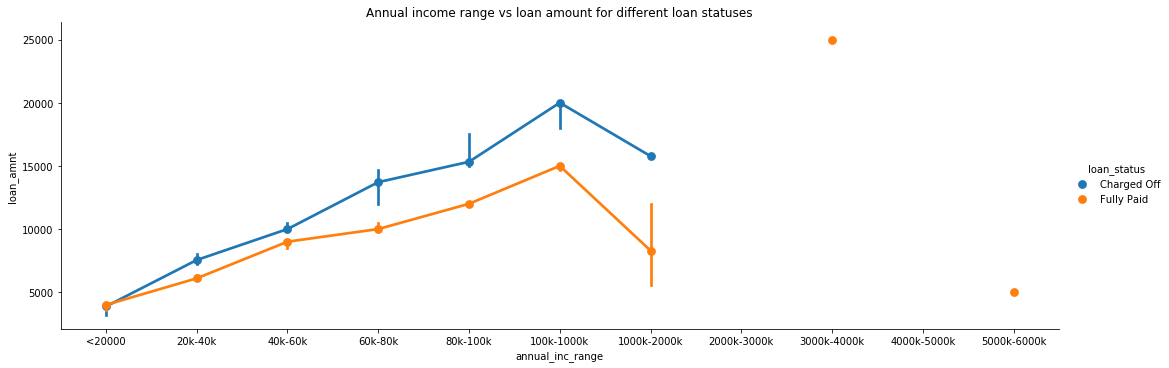

In [100]:
sns.factorplot('annual_inc_range','loan_amnt',hue='loan_status',data=loan,estimator=np.median,aspect=3)
plt.title('Annual income range vs loan amount for different loan statuses')
plt.show()

Conclusion-

**It can be observed that people who defaulted requested for higher loan amount across different range of annual income.**

> #### Annual income ratio vs loan amount for different loan statuses

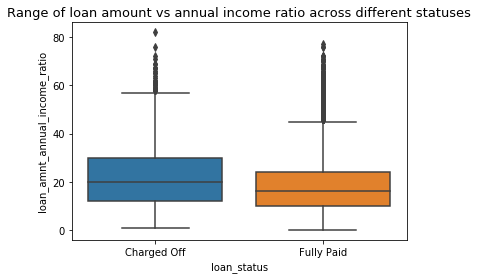

In [101]:
#Deriving ratio of loan amount and annual income for analysis
loan['loan_amnt_annual_income_ratio'] =round(((loan['loan_amnt']/loan['annual_inc'])*100),0)
bins=[0,10,20,30,40,50,60,70,80,90,100]
loan['loan_amnt_annual_income_ratio_range'] = pd.cut(loan['loan_amnt_annual_income_ratio'],bins)
sns.boxplot(loan.loan_status, loan.loan_amnt_annual_income_ratio)
plt.title('Range of loan amount vs annual income ratio across different statuses',size=13)
plt.show()

Conclusion-

**Hence it can be seen that if the ratio of loan amount vs annual income is more than around 20% it is riskier for LC as there is high chance of loan default.**

> #### Annual Income vs dti and employment length vs dti

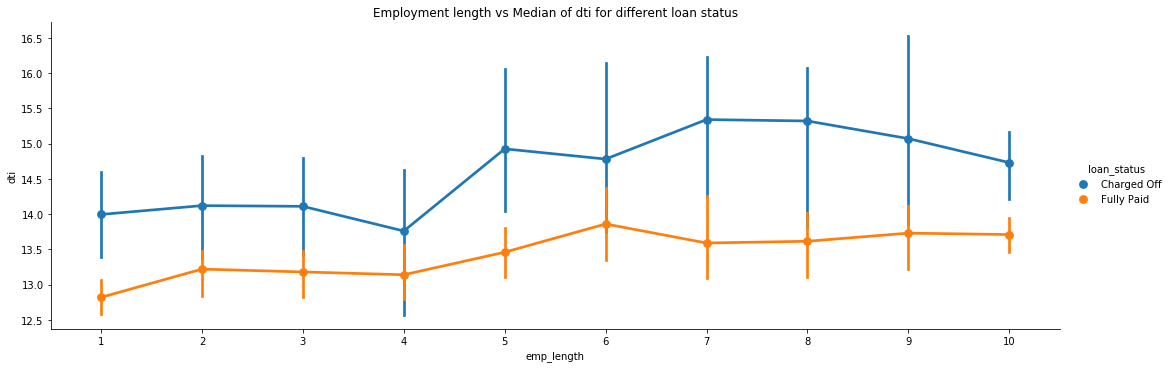

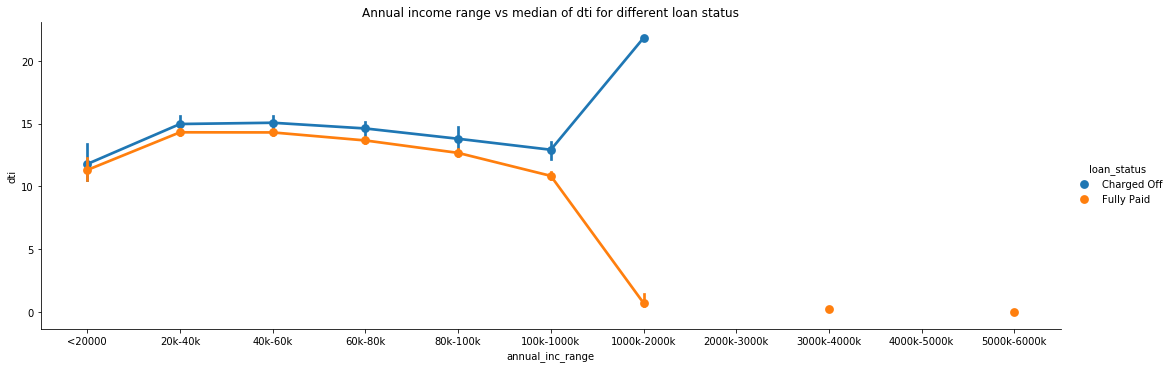

In [102]:
sns.factorplot('emp_length','dti', hue='loan_status', data=loan,estimator=np.median,aspect=3)
plt.title('Employment length vs Median of dti for different loan status')
plt.show()
sns.factorplot('annual_inc_range','dti', hue='loan_status', data=loan,estimator=np.median,aspect=3)
plt.title('Annual income range vs median of dti for different loan status')
plt.show()

Conclusion-

****It is evident from the comparison of dti with annual income and employment length that if the dti(debt to income ratio) is higher than 13.5% then there are high chances for the person to default****

**Grades and sub-grades:** LendingClub assigns a grade (A–C) and sub-grade (1-5) to each Note, which reflects LendingClub’s assessment of the credit risk of the corresponding loan. For example, if the borrower has a weaker credit profile they would get a lower grade and sub-grade, like C5. If the borrower has a stronger credit history, they’d get a higher grade and sub-grade, like A1 or B1.  
**Interest rates:** The stated interest rate on each Note varies depending on the credit risk of the corresponding loan. So higher grade Notes (higher credit quality) come with lower interest rates. Lower grade Notes come with higher interest rates to factor in the risk you’re taking on by investing in weaker credit. 

> #### Grade vs Interest Rate

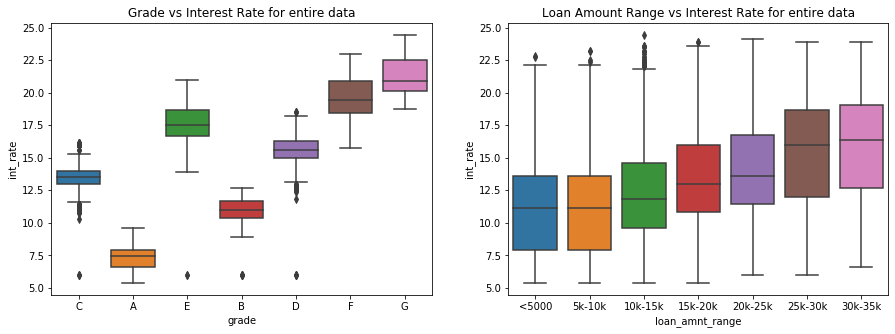

In [105]:
fig,ax= plt.subplots(1,2,figsize=[15,5])
sns.boxplot(loan.grade, loan.int_rate,ax=ax[0])
sns.boxplot(loan.loan_amnt_range, loan.int_rate,ax=ax[1])
ax[0].set_title('Grade vs Interest Rate for entire data')
ax[1].set_title('Loan Amount Range vs Interest Rate for entire data')
plt.show()

Conclusion-

**The loans with lower grades i.e. riskier profiles have higher interest rates and also the interest rate increases as the loan amount increases.**


**Deriving loan_amnt slabs for analysis**

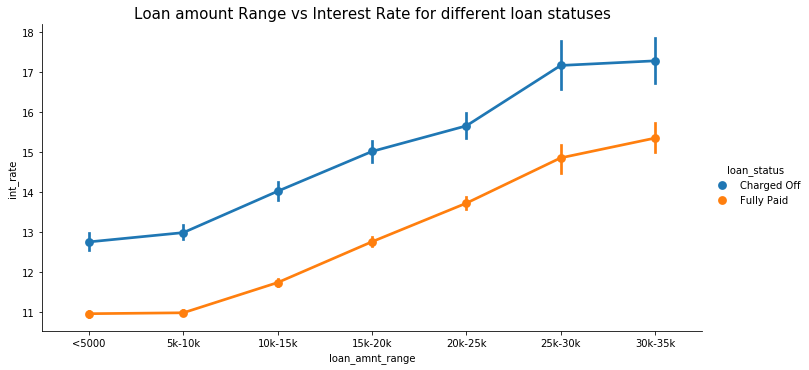

In [104]:
#Deriving loan_amnt slabs for analysis
bins1=[0,5000,10000,15000,20000,25000,30000,35000]
names1=['<5000','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'],bins1,labels=names1)
sns.factorplot('loan_amnt_range','int_rate',hue='loan_status',data=loan,aspect=2)
plt.title('Loan amount Range vs Interest Rate for different loan statuses',size=15)
plt.show()

Conclusion-

**Hence, it could be seen that since charged_off had more percentage of lower grades (Analysed in categorical plots) which means riskier profiles hence they were charged higher interest rates and they defaulted as seen in the visualizations.  
Also, since loan amount applied for was higher in charged off hence they had higher int rate and so higher rate of default.
Therefore if the interest rate is more than approximately 12.5 % for lower loan amount slab(0-20k) and more than aproximately 14.5% for higher loan amount slab(20-35k) then the person is likely to default.**


> #### charged_off.recoveries

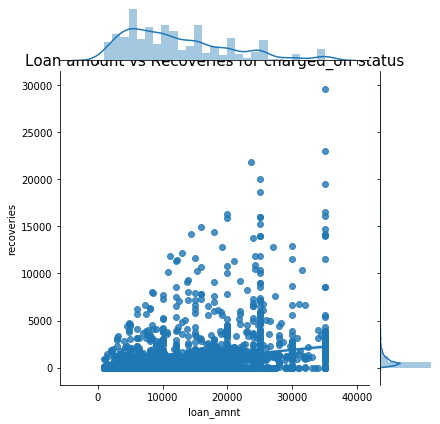

In [106]:
#charged_off.recoveries
sns.jointplot('loan_amnt','recoveries',data=charged_off,kind='reg')
plt.title('Loan amount vs Recoveries for charged_off status',size=15)
plt.show()

> #### Purpose vs median of Revolving Rate utilisation

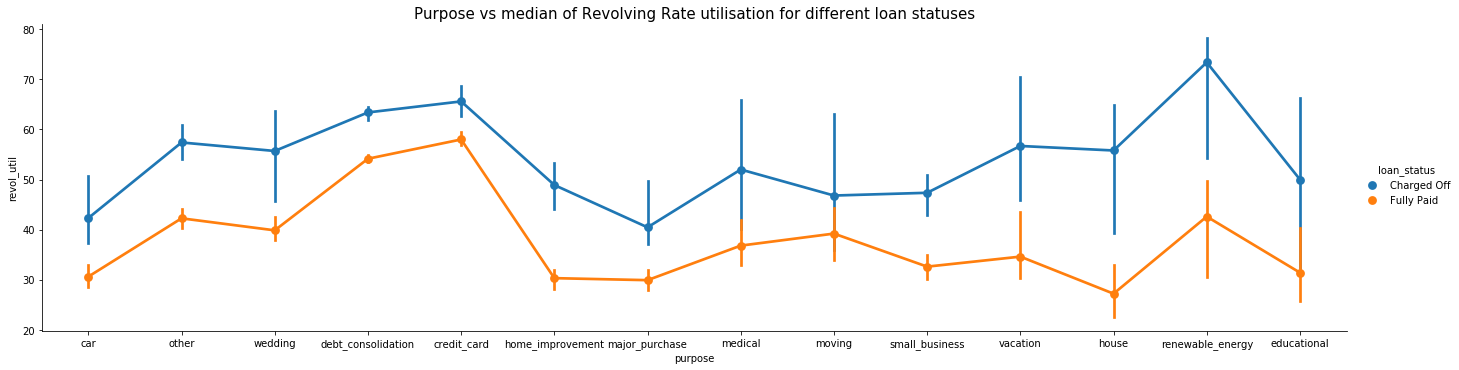

In [107]:
sns.factorplot('purpose','revol_util', hue='loan_status', data=loan,aspect=3.8,estimator=np.median)
plt.title('Purpose vs median of Revolving Rate utilisation for different loan statuses',size=15)
plt.show()

> #### Loan amount range vs median of Revolving Rate utilisation

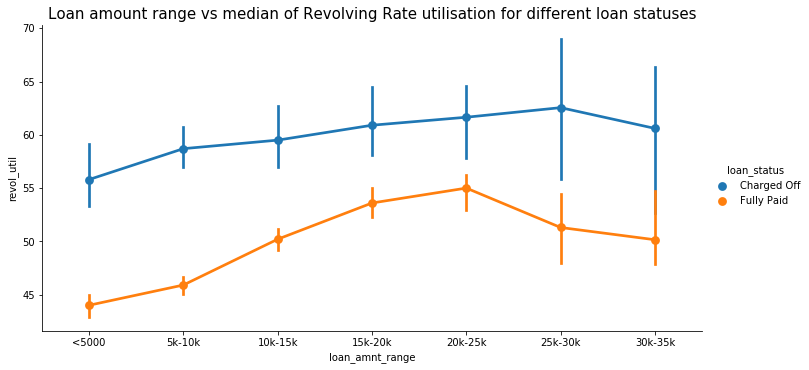

In [108]:
sns.factorplot('loan_amnt_range','revol_util', hue='loan_status' ,data=loan,estimator=np.median,aspect=2)
plt.title('Loan amount range vs median of Revolving Rate utilisation for different loan statuses',size=15)
plt.show()

> #### Annual Income range vs median of Revolving Rate utilisation

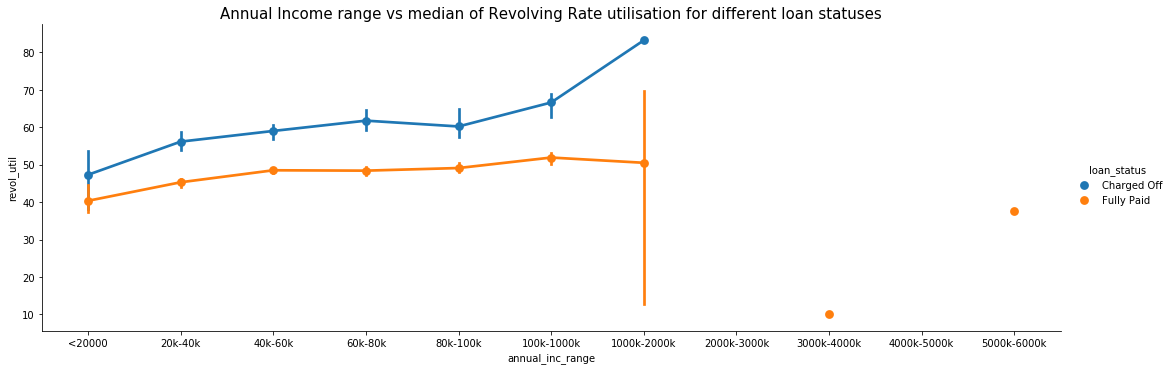

In [109]:
sns.factorplot('annual_inc_range','revol_util', hue='loan_status' ,data=loan,estimator=np.median,aspect=3)
plt.title('Annual Income range vs median of Revolving Rate utilisation for different loan statuses',size=15)
plt.show()

Conclusion-

**Hence it can be seen on comparison with mutiple factors like purpose, annual income range and loan amount range that defaulters had higher utilisation rate as compared to those who fully paid off the loan.
So, if the revol_util range is on an average more than 50% it's riskier and the person is likely to default.**